In [1]:
# Structural Design supported by Machine Learning
# Original code developed by Vahid Moosavi (sevamoo@gmail.com) and adapted by Pierluigi D'Acunto (pierluigi.dacunto@tum.de)

#If you use the scripts please reference the official GitHub repository:
#@Misc{sdml2021,
#author = {D'Acunto, Pierluigi and Ohbrock, Patrick Ole and Saldana Ochoa, Karla and Moosavi, Vahid},
#title = {{SDML: Structural Design supported by Machine Learning}},
#year = {2021},
#url = {https://github.com/pierluigidacunto/SDML},
#}

# Machine Learning-Assisted Computational Structural Design

## 0 Environment

In [6]:
!pip install numpy
!pip install pandas
!pip install scipy
!pip install matplotlib
!pip install numexpr

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
# Import libraries

import pandas as pd
import numpy as np
import sompylib.sompy as SOM
import math
import pathlib
import os
import matplotlib.pyplot as plt

## 1 Reading CEM data

In [8]:
data_file = "CEM/Data/240806_data_00_CEM.csv"

In [17]:
# Read CSV file and create DataFrame
root_path = pathlib.Path().absolute()

data = pd.read_csv(os.path.join(
    root_path,
    data_file), header=None)

data = data.dropna()
data.head(10)  # show first 10 entries of DataFrame

0         1         2         3         4          5         6    \
0  11.053293 -2.215451  0.962143 -0.124993  0.174456 -24.502925 -3.497571   
1  19.809351 -2.725744  0.965676 -0.078056 -0.089388 -29.080566 -4.450883   
2  19.307250 -1.918171  0.957000  0.031025  0.047402 -26.259059 -3.104962   
3  14.529860 -1.923345  0.954132 -0.133561  0.017593 -29.388453 -3.542591   
4  11.853671 -1.545379  0.978534 -0.111592  0.093475 -20.721077 -3.719690   
5  19.968321 -1.785888  0.978358 -0.086165  0.199824 -25.319267 -2.703256   
6  19.667466 -2.722765  0.961461 -0.148563 -0.027422 -24.084745 -2.761177   
7  17.987678 -2.315721  0.962039 -0.125283 -0.066783 -28.314817 -1.912317   
8  18.828903 -2.594578  0.962092 -0.195518  0.182689 -27.119617 -1.285677   
9  17.620845 -1.584158  0.972464  0.069000  0.157371 -22.355564 -3.113362   

        7         8          9    ...        498        499       500  \
0  2.010365  1.263953   3.015713  ...  11.053293  11.053293 -2.215451   
1  4.175257  0.426267   5.073588  ...  19.809351  19.809351 -2.725744   
2  4.476623  0.857323  13.428574  ...  19.307250  19.307250 -1.918171   
3  4.437829  1.834450  19.590452  ...  14.529860  14.529860 -1.923345   
4  3.244114  0.201728   1.229421  ...  11.853671  11.853671 -1.545379   
5  2.042605  1.734630  18.555559  ...  19.968321  19.968321 -1.785888   
6  3.380235  0.950369   8.623888  ...  19.667466  19.667466 -2.722765   
7  5.415488  1.890311  10.000616  ...  17.987678  17.987678 -2.315721   
8  5.791214  0.173382  11.830853  ...  18.828903  18.828903 -2.594578   
9  2.947440  1.513028   2.492078  ...  17.620845  17.620845 -1.584158   

        501       502       503       504       505           506        507  
0 -2.215451 -0.124993 -0.124993 -0.124993 -0.124993   7883.851499   7.762655  
1 -2.725744 -0.078056 -0.078056 -0.078056 -0.078056  10637.768958   5.957113  
2 -1.918171  0.031025  0.031025  0.031025  0.031025  14185.873830   9.102210  
3 -1.923345 -0.133561 -0.133561 -0.133561 -0.133561  15220.635289  11.706990  
4 -1.545379 -0.111592 -0.111592 -0.111592 -0.111592   7123.083010  10.704962  
5 -1.785888 -0.086165 -0.086165 -0.086165 -0.086165  18918.924350   5.497823  
6 -2.722765 -0.148563 -0.148563 -0.148563 -0.148563  11825.011953   7.777674  
7 -2.315721 -0.125283 -0.125283 -0.125283 -0.125283  12414.898344   8.576663  
8 -2.594578 -0.195518 -0.195518 -0.195518 -0.195518  13251.745732  10.370622  
9 -1.584158  0.069000  0.069000  0.069000  0.069000   8663.473403   8.026496  

[10 rows x 508 columns]

## 1.1 Data description

| DESCRIPTION | VARIABLE NAME | DIMENSION | SOURCE |
| --- | --- | --- | --- |
| deviation force at main cable midspan | cable_center_deviation_force | 1 | input |
| deviation force at deck midspan | deck_center_deviation_force | 1 | input |
| force in hangars | hangar_force | 1 | input |
| force in deviations inside deck | deck_deviation_force | 1 | input |
| force in deviations between main cables | cable_deviation_force | 1 | input |
| force in support towers | tower_force | 1 | input |
| force in brace between support towers | tower_brace_force | 1 | input |
| rise of the deck | deck_rise | 1 | input
| vertical distance between the deck and main cables at midspan | cable_deck_midspan_distance | 1 | input |
| offset of tower base location in x direction/perpendicular to the river | tower_base_x_offset | 1 | input |
| offset of tower base location in y direction/parallel | tower_base_y_offset | 1 | input |
| offset of origin nodes at midspan to create a twist in the bridge | twist_offset | 1 | input |
| number of nodes | nN | 1 | output |
| number of trail edges | nT | 1 | output |
| number of deviation edges | nD | 1 | output |
| load X | loadX | 1 | input |
| load Y | loadY | 1 | input |
| load Z | loadZ | 1 | input |
| nodes position X | posX | nN | output |
| nodes position Y | posX | nN | output |
| nodes position Z | posX | nN | output |
| trail lenghts | traLen | nT | output |
| trail magnitudes | traMag | nT | output |
| deviation lenghts | devLen | nD | output |
| deviation magnitudes | devMag | nD | input |
| total load path | load_path | 1 | output |
| highest inclination of the deck in degrees | maximum deck inclination | 1 | output |

Read graph info.

In [18]:
nN = int(data.iloc[0][12])
nT = int(data.iloc[0][13])
nD = int(data.iloc[0][14])

print('Number of Nodes = {0}\nNumber of Trail Edges = {1}\nNumber of Deviation Edges = {2}'.format(nN, nT, nD))

Number of Nodes = 76
Number of Trail Edges = 64
Number of Deviation Edges = 66


Generate labels for columns in DataFrame

In [19]:
label_columns_fix_head = [
    "cable_center_deviation_force",
    "deck_center_deviation_force",
    "hangar_force",
    "deck_deviation_force",
    "cable_deviation_force",
    "tower_force",
    "tower_brace_force",
    "deck_rise",
    "cable_deck_midspan_distance",
    "tower_base_x_offset",
    "tower_base_y_offset",
    "twist_offset",
    "nN",
    "nT",
    "nD",
    "loadX",
    "loadY",
    "loadZ"
]

label_columns_fix_tail = [
    "load_path",
    "maximum_deck_inclination"
]

nX = len(label_columns_fix_head)    # number of fixed entries

label_columns = label_columns_fix_head[:]
label_columns += ["posX_" + str(i) for i in range(nN)]
label_columns += ["posY_" + str(i) for i in range(nN)]
label_columns += ["posZ_" + str(i) for i in range(nN)]    
label_columns += ["traLen_" + str(i) for i in range(nT)]
label_columns += ["traMag_" + str(i) for i in range(nT)]
label_columns += ["devLen_" + str(i) for i in range(nD)]
label_columns += ["devMag_" + str(i) for i in range(nD)]
label_columns += label_columns_fix_tail

data.columns = label_columns
data.head(10)

cable_center_deviation_force  deck_center_deviation_force  hangar_force  \
0                     11.053293                    -2.215451      0.962143   
1                     19.809351                    -2.725744      0.965676   
2                     19.307250                    -1.918171      0.957000   
3                     14.529860                    -1.923345      0.954132   
4                     11.853671                    -1.545379      0.978534   
5                     19.968321                    -1.785888      0.978358   
6                     19.667466                    -2.722765      0.961461   
7                     17.987678                    -2.315721      0.962039   
8                     18.828903                    -2.594578      0.962092   
9                     17.620845                    -1.584158      0.972464   

   deck_deviation_force  cable_deviation_force  tower_force  \
0             -0.124993               0.174456   -24.502925   
1             -0.078056              -0.089388   -29.080566   
2              0.031025               0.047402   -26.259059   
3             -0.133561               0.017593   -29.388453   
4             -0.111592               0.093475   -20.721077   
5             -0.086165               0.199824   -25.319267   
6             -0.148563              -0.027422   -24.084745   
7             -0.125283              -0.066783   -28.314817   
8             -0.195518               0.182689   -27.119617   
9              0.069000               0.157371   -22.355564   

   tower_brace_force  deck_rise  cable_deck_midspan_distance  \
0          -3.497571   2.010365                     1.263953   
1          -4.450883   4.175257                     0.426267   
2          -3.104962   4.476623                     0.857323   
3          -3.542591   4.437829                     1.834450   
4          -3.719690   3.244114                     0.201728   
5          -2.703256   2.042605                     1.734630   
6          -2.761177   3.380235                     0.950369   
7          -1.912317   5.415488                     1.890311   
8          -1.285677   5.791214                     0.173382   
9          -3.113362   2.947440                     1.513028   

   tower_base_x_offset  ...  devMag_58  devMag_59  devMag_60  devMag_61  \
0             3.015713  ...  11.053293  11.053293  -2.215451  -2.215451   
1             5.073588  ...  19.809351  19.809351  -2.725744  -2.725744   
2            13.428574  ...  19.307250  19.307250  -1.918171  -1.918171   
3            19.590452  ...  14.529860  14.529860  -1.923345  -1.923345   
4             1.229421  ...  11.853671  11.853671  -1.545379  -1.545379   
5            18.555559  ...  19.968321  19.968321  -1.785888  -1.785888   
6             8.623888  ...  19.667466  19.667466  -2.722765  -2.722765   
7            10.000616  ...  17.987678  17.987678  -2.315721  -2.315721   
8            11.830853  ...  18.828903  18.828903  -2.594578  -2.594578   
9             2.492078  ...  17.620845  17.620845  -1.584158  -1.584158   

   devMag_62  devMag_63  devMag_64  devMag_65     load_path  \
0  -0.124993  -0.124993  -0.124993  -0.124993   7883.851499   
1  -0.078056  -0.078056  -0.078056  -0.078056  10637.768958   
2   0.031025   0.031025   0.031025   0.031025  14185.873830   
3  -0.133561  -0.133561  -0.133561  -0.133561  15220.635289   
4  -0.111592  -0.111592  -0.111592  -0.111592   7123.083010   
5  -0.086165  -0.086165  -0.086165  -0.086165  18918.924350   
6  -0.148563  -0.148563  -0.148563  -0.148563  11825.011953   
7  -0.125283  -0.125283  -0.125283  -0.125283  12414.898344   
8  -0.195518  -0.195518  -0.195518  -0.195518  13251.745732   
9   0.069000   0.069000   0.069000   0.069000   8663.473403   

   maximum_deck_inclination  
0                  7.762655  
1                  5.957113  
2                  9.102210  
3                 11.706990  
4                 10.704962  
5                  5.497823  
6              

## 2. Compute Feature Vectors

We pre-calculate high-order statistics (Min, Max, Mean, Standard Deviation, Skewness, Kurtosis) per type (Floor Height, Node, Trail, Deviation)

In [22]:
from numpy import mean
from numpy import std
from scipy.stats import skew
from scipy.stats import kurtosis

# Convert initial DataFrame to Numpy 2D array
src_data = data.values[:]

# Initialize list of list where initial variable features are replaced by their corresponding statistics
data_arr2d = []

# Iterate through each row of the array (i.e. each row of the DataFrame)
for i in range(len(src_data)): 
    src_row = src_data[i]
    # Calculate statistics per feature    
    p0 = nX
    p1 = p0 + nN
    posX_arr = src_row[p0:p1]
    posX_min = posX_arr.min()
    posX_max = posX_arr.max()
    posX_mean = mean(posX_arr)
    posX_std = std(posX_arr)
    posX_skew = skew(posX_arr)
    posX_kurt = kurtosis(posX_arr)

    p0 = p1
    p1 = p0 + nN
    posY_arr = src_row[p0:p1]
    posY_min = posY_arr.min()
    posY_max = posY_arr.max()
    posY_mean = mean(posY_arr)
    posY_std = std(posY_arr)
    posY_skew = skew(posY_arr)
    posY_kurt = kurtosis(posY_arr)    

    p0 = p1
    p1 = p0 + nN
    posZ_arr = src_row[p0:p1]
    posZ_min = posZ_arr.min()
    posZ_max = posZ_arr.max()
    posZ_mean = mean(posZ_arr)
    posZ_std = std(posZ_arr)
    posZ_skew = skew(posZ_arr)
    posZ_kurt = kurtosis(posZ_arr)

    p0 = p1
    p1 = p0 + nT
    traLen_arr = src_row[p0:p1]
    traLen_min = traLen_arr.min()
    traLen_max = traLen_arr.max()
    traLen_mean = mean(traLen_arr)
    traLen_std = std(traLen_arr)
    traLen_skew = skew(traLen_arr)
    traLen_kurt = kurtosis(traLen_arr) 
           
    p0 = p1
    p1 = p0 + nT
    traMag_arr = src_row[p0:p1]
    traMag_min = traMag_arr.min()
    traMag_max = traMag_arr.max()
    traMag_mean = mean(traMag_arr)
    traMag_std = std(traMag_arr)
    traMag_skew = skew(traMag_arr)
    traMag_kurt = kurtosis(traMag_arr)
    
    p0 = p1
    p1 = p0 + nD
    devLen_arr = src_row[p0:p1]
    devLen_min = devLen_arr.min()
    devLen_max = devLen_arr.max()
    devLen_mean = mean(devLen_arr)
    devLen_std = std(devLen_arr)
    devLen_skew = skew(devLen_arr)
    devLen_kurt = kurtosis(devLen_arr) 
           
    p0 = p1
    p1 = p0 + nD
    devMag_arr = src_row[p0:p1]
    devMag_min = devMag_arr.min()
    devMag_max = devMag_arr.max()
    devMag_mean = mean(devMag_arr)
    devMag_std = std(devMag_arr)
    devMag_skew = skew(devMag_arr)
    devMag_kurt = kurtosis(devMag_arr)

    # Assemble flattened features in an array
    data_arr = [
                        posX_min, posX_max, posX_mean, posX_std, posX_skew, posX_kurt,
                        posY_min, posY_max, posY_mean, posY_std, posY_skew, posY_kurt,
                        posZ_min, posZ_max, posZ_mean, posZ_std, posZ_skew, posZ_kurt,
                        traLen_min, traLen_max, traLen_mean, traLen_std, traLen_skew, traLen_kurt,
                        traMag_min, traMag_max, traMag_mean, traMag_std, traMag_skew, traMag_kurt,
                        devLen_min, devLen_max, devLen_mean, devLen_std, devLen_skew, devLen_kurt,
                        devMag_min, devMag_max, devMag_mean, devMag_std, devMag_skew, devMag_kurt,
                        ]
    
    data_arr2d.append(data_arr)

In [26]:
# Convert list of list into DataFrame
data_hos = pd.DataFrame.from_records(data_arr2d)
data_hos.index = data.index

label_columns = [
                "posX_min", "posX_max", "posX_mean", "posX_std", "posX_skew", "posX_kurt",
                "posY_min", "posY_max", "posY_mean", "posY_std", "posY_skew", "posY_kurt",
                "posZ_min", "posZ_max", "posZ_mean", "posZ_std", "posZ_skew", "posZ_kurt",
                "traLen_min", "traLen_max", "traLen_mean", "traLen_std", "traLen_skew", "traLen_kurt",
                "traMag_min", "traMag_max", "traMag_mean", "traMag_std", "traMag_skew", "traMag_kurt",
                "devLen_min", "devLen_max", "devLen_mean", "devLen_std", "devLen_skew", "devLen_kurt",
                "devMag_min", "devMag_max", "devMag_mean", "devMag_std", "devMag_skew", "devMag_kurt",
                ]

data_hos.columns = label_columns
data_hos.head(10)

posX_min   posX_max  posX_mean   posX_std     posX_skew  posX_kurt  \
0 -152.781586 -12.797782 -82.789684  37.486763 -4.477993e-15  -1.143393   
1 -156.691996  -8.887373 -82.789684  39.873032 -1.603848e-14  -1.079455   
2 -178.769347  13.189978 -82.789684  42.783270 -2.435252e-15  -0.567495   
3 -184.779475  19.200106 -82.789684  44.139076  6.118622e-15  -0.345175   
4 -153.729600 -11.849769 -82.789684  37.215455 -2.050575e-15  -1.127400   
5 -204.258173  38.678804 -82.789684  46.472393  1.513227e-14   0.359933   
6 -169.957154   4.377785 -82.789684  40.726703  2.159851e-15  -0.789407   
7 -167.468135   1.888766 -82.789684  41.515937 -8.134589e-16  -0.878337   
8 -172.762510   7.183141 -82.789684  41.781923  6.342175e-15  -0.728504   
9 -156.844507  -8.734862 -82.789684  38.132605  1.063574e-15  -1.092336   

   posY_min   posY_max  posY_mean  posY_std  ...  devLen_mean  devLen_std  \
0 -3.520100  12.956940    4.71842  5.108702  ...     8.747391    4.802909   
1 -1.321112  10.757952    4.71842  3.544084  ...     5.881097    3.481597   
2  0.377497   9.059343    4.71842  3.634620  ...     7.131418    4.264002   
3  0.379430   9.057409    4.71842  3.576538  ...     8.342603    5.838613   
4 -1.441850  10.878690    4.71842  3.855414  ...     7.904387    4.875428   
5 -0.318761   9.755601    4.71842  4.028987  ...     7.786783    4.608195   
6 -2.244993  11.681833    4.71842  4.002498  ...     6.491313    3.706917   
7 -0.050688   9.487528    4.71842  3.470629  ...     7.224304    4.329319   
8 -3.266071  12.702911    4.71842  4.864333  ...     7.213077    4.482582   
9 -1.447400  10.884240    4.71842  4.349416  ...     7.653335    3.590988   

   devLen_skew  devLen_kurt  devMag_min  devMag_max  devMag_mean  devMag_std  \
0     0.786760     0.564182  -24.502925   11.053293    -0.904525    6.339836   
1     0.836486     1.410976  -29.080566   19.809351    -1.005487    7.959747   
2     1.338470     2.908713  -26.259059   19.307250    -0.735970    7.303250   
3     2.030063     4.153172  -29.388453   14.529860    -1.126270    7.639095   
4     0.722635     0.264761  -20.721077   11.853671    -0.644876    5.546744   
5     1.808795     4.341270  -25.319267   19.968321    -0.626265    7.160816   
6     1.030268     1.678067  -24.084745   19.667466    -0.659316    6.877176   
7     1.618147     2.923693  -28.314817   17.987678    -0.931694    7.628667   
8     0.934632     1.680589  -27.119617   18.828903    -0.785185    7.440623   
9     0.210522    -0.256850  -22.355564   17.620845    -0.502688    6.342131   

   devMag_skew  devMag_kurt  
0    -2.912313     9.021970  
1    -2.113161     7.799841  
2    -1.955814     7.761026  
3    -2.799457     8.892024  
4    -2.521002     8.188650  
5    -1.759943     7.644201  
6    -1.608656     7.473334  
7    -2.333937     8.209350  
8    -2.126243     7.974600  
9    -1.768726     7.565931  

[10 rows x 42 columns]

In [29]:
# merge the HOS data with other fixed-length data in the source data frame

data_flat = pd.concat(
    [
        data[label_columns_fix_head], 
        data_hos, 
        data[label_columns_fix_tail]
    ],
    axis=1)

data_flat.head(10)

cable_center_deviation_force  deck_center_deviation_force  hangar_force  \
0                     11.053293                    -2.215451      0.962143   
1                     19.809351                    -2.725744      0.965676   
2                     19.307250                    -1.918171      0.957000   
3                     14.529860                    -1.923345      0.954132   
4                     11.853671                    -1.545379      0.978534   
5                     19.968321                    -1.785888      0.978358   
6                     19.667466                    -2.722765      0.961461   
7                     17.987678                    -2.315721      0.962039   
8                     18.828903                    -2.594578      0.962092   
9                     17.620845                    -1.584158      0.972464   

   deck_deviation_force  cable_deviation_force  tower_force  \
0             -0.124993               0.174456   -24.502925   
1             -0.078056              -0.089388   -29.080566   
2              0.031025               0.047402   -26.259059   
3             -0.133561               0.017593   -29.388453   
4             -0.111592               0.093475   -20.721077   
5             -0.086165               0.199824   -25.319267   
6             -0.148563              -0.027422   -24.084745   
7             -0.125283              -0.066783   -28.314817   
8             -0.195518               0.182689   -27.119617   
9              0.069000               0.157371   -22.355564   

   tower_brace_force  deck_rise  cable_deck_midspan_distance  \
0          -3.497571   2.010365                     1.263953   
1          -4.450883   4.175257                     0.426267   
2          -3.104962   4.476623                     0.857323   
3          -3.542591   4.437829                     1.834450   
4          -3.719690   3.244114                     0.201728   
5          -2.703256   2.042605                     1.734630   
6          -2.761177   3.380235                     0.950369   
7          -1.912317   5.415488                     1.890311   
8          -1.285677   5.791214                     0.173382   
9          -3.113362   2.947440                     1.513028   

   tower_base_x_offset  ...  devLen_skew  devLen_kurt  devMag_min  devMag_max  \
0             3.015713  ...     0.786760     0.564182  -24.502925   11.053293   
1             5.073588  ...     0.836486     1.410976  -29.080566   19.809351   
2            13.428574  ...     1.338470     2.908713  -26.259059   19.307250   
3            19.590452  ...     2.030063     4.153172  -29.388453   14.529860   
4             1.229421  ...     0.722635     0.264761  -20.721077   11.853671   
5            18.555559  ...     1.808795     4.341270  -25.319267   19.968321   
6             8.623888  ...     1.030268     1.678067  -24.084745   19.667466   
7            10.000616  ...     1.618147     2.923693  -28.314817   17.987678   
8            11.830853  ...     0.934632     1.680589  -27.119617   18.828903   
9             2.492078  ...     0.210522    -0.256850  -22.355564   17.620845   

   devMag_mean  devMag_std  devMag_skew  devMag_kurt     load_path  \
0    -0.904525    6.339836    -2.912313     9.021970   7883.851499   
1    -1.005487    7.959747    -2.113161     7.799841  10637.768958   
2    -0.735970    7.303250    -1.955814     7.761026  14185.873830   
3    -1.126270    7.639095    -2.799457     8.892024  15220.635289   
4    -0.644876    5.546744    -2.521002     8.188650   7123.083010   
5    -0.626265    7.160816    -1.759943     7.644201  18918.924350   
6    -0.659316    6.877176    -1.608656     7.473334  11825.011953   
7    -0.931694    7.628667    -2.333937     8.209350  12414.898344   
8    -0.785185    7.440623    -2.126243     7.974600  13251.745732   
9    -0.502688    6.342131    -1.768726     7.565931   8663.473403   

   maximum_deck_inclination  
0                  7.762655  
1                  5.9

## 2.1 Filter Data

In [38]:
# Filter DataFrame 1

traMag_max_mask = abs(data_flat['traLen_max']) < abs(data_flat['traLen_max']).quantile(0.9)
data_flat_filter = data_flat[traMag_max_mask].copy()

data_flat_filter.shape

(4494, 62)

In [39]:
# Filter DataFrame 2

devLen_min_mask = abs(data_flat_filter['devLen_min']) > abs(data_flat_filter['devLen_min']).quantile(.1)
data_flat_filter = data_flat_filter[devLen_min_mask].copy()

data_flat_filter.shape

(4044, 62)

In [40]:
# Filter DataFrame 3
totLP_mask = abs(data_flat_filter['load_path']) < abs(data_flat_filter['load_path']).quantile(.9)
data_flat_filter = data_flat_filter[totLP_mask].copy()

data_flat_filter.shape

(3639, 62)

In [41]:
# Update initial DataFrame in compliance with previous filtering on flat DataFrame
data_filter = data[data.index.isin(data_flat_filter.index)]
data_filter.head(10)

cable_center_deviation_force  deck_center_deviation_force  hangar_force  \
0                      11.053293                    -2.215451      0.962143   
1                      19.809351                    -2.725744      0.965676   
2                      19.307250                    -1.918171      0.957000   
6                      19.667466                    -2.722765      0.961461   
7                      17.987678                    -2.315721      0.962039   
9                      17.620845                    -1.584158      0.972464   
10                     13.583373                    -2.113058      0.962649   
12                     18.831965                    -2.502308      0.976467   
13                     11.838140                    -2.855568      0.975548   
14                     16.166421                    -1.915391      0.953805   

    deck_deviation_force  cable_deviation_force  tower_force  \
0              -0.124993               0.174456   -24.502925   
1              -0.078056              -0.089388   -29.080566   
2               0.031025               0.047402   -26.259059   
6              -0.148563              -0.027422   -24.084745   
7              -0.125283              -0.066783   -28.314817   
9               0.069000               0.157371   -22.355564   
10             -0.088809               0.041966   -26.502123   
12              0.040051               0.011715   -27.560586   
13             -0.120763              -0.051625   -29.941259   
14             -0.007420               0.076255   -27.267900   

    tower_brace_force  deck_rise  cable_deck_midspan_distance  \
0           -3.497571   2.010365                     1.263953   
1           -4.450883   4.175257                     0.426267   
2           -3.104962   4.476623                     0.857323   
6           -2.761177   3.380235                     0.950369   
7           -1.912317   5.415488                     1.890311   
9           -3.113362   2.947440                     1.513028   
10          -3.697820   3.734530                     0.893366   
12          -4.447258   2.746808                     1.915263   
13          -2.082976   3.820587                     1.954736   
14          -3.687696   4.948482                     0.339948   

    tower_base_x_offset  ...  devMag_58  devMag_59  devMag_60  devMag_61  \
0              3.015713  ...  11.053293  11.053293  -2.215451  -2.215451   
1              5.073588  ...  19.809351  19.809351  -2.725744  -2.725744   
2             13.428574  ...  19.307250  19.307250  -1.918171  -1.918171   
6              8.623888  ...  19.667466  19.667466  -2.722765  -2.722765   
7             10.000616  ...  17.987678  17.987678  -2.315721  -2.315721   
9              2.492078  ...  17.620845  17.620845  -1.584158  -1.584158   
10             8.924950  ...  13.583373  13.583373  -2.113058  -2.113058   
12             9.297833  ...  18.831965  18.831965  -2.502308  -2.502308   
13             4.943154  ...  11.838140  11.838140  -2.855568  -2.855568   
14            13.840007  ...  16.166421  16.166421  -1.915391  -1.915391   

    devMag_62  devMag_63  devMag_64  devMag_65     load_path  \
0   -0.124993  -0.124993  -0.124993  -0.124993   7883.851499   
1   -0.078056  -0.078056  -0.078056  -0.078056  10637.768958   
2    0.031025   0.031025   0.031025   0.031025  14185.873830   
6   -0.148563  -0.148563  -0.148563  -0.148563  11825.011953   
7   -0.125283  -0.125283  -0.125283  -0.125283  12414.898344   
9    0.069000   0.069000   0.069000   0.069000   8663.473403   
10  -0.088809  -0.088809  -0.088809  -0.088809  10007.165263   
12   0.040051   0.040051   0.040051   0.040051  12043.312494   
13  -0.120763  -0.120763  -0.120763  -0.120763   9853.237481   
14  -0.007420  -0.007420  -0.007420  -0.007420  12987.271456   

    maximum_deck_inclination  
0                   7.762655  
1                   5.957113  
2                   9.102210  
6                   7.777674  
7               

## 2.2 Create XXX

In [31]:
# Create DataFrame of input variables 

input_features = ["loadX", "loadY", "loadZ"]
input_features.extend(["devMag_" + str(i) for i in range(nD)])

input_data_filter = data_filter[input_features]    # as DataFrame

input_data_filter_arr = np.array(input_data_filter)    # as Array

In [32]:
input_data_filter

loadX  loadY  loadZ  devMag_0  devMag_1  devMag_2  devMag_3  devMag_4  \
0       0.0    0.0   -1.0 -3.497571 -3.497571  0.962143  0.962143 -0.124993   
1       0.0    0.0   -1.0 -4.450883 -4.450883  0.965676  0.965676 -0.078056   
2       0.0    0.0   -1.0 -3.104962 -3.104962  0.957000  0.957000  0.031025   
6       0.0    0.0   -1.0 -2.761177 -2.761177  0.961461  0.961461 -0.148563   
7       0.0    0.0   -1.0 -1.912317 -1.912317  0.962039  0.962039 -0.125283   
...     ...    ...    ...       ...       ...       ...       ...       ...   
4987    0.0    0.0   -1.0 -0.904088 -0.904088  0.976190  0.976190  0.048549   
4989    0.0    0.0   -1.0 -3.233573 -3.233573  0.967445  0.967445  0.071726   
4990    0.0    0.0   -1.0 -1.865085 -1.865085  0.950293  0.950293  0.003005   
4991    0.0    0.0   -1.0 -0.696021 -0.696021  0.971499  0.971499 -0.038935   
4993    0.0    0.0   -1.0 -2.818679 -2.818679  0.972390  0.972390 -0.010487   

      devMag_5  devMag_6  ...  devMag_56  devMag_57  devMag_58  devMag_59  \
0    -0.124993 -0.124993  ...   0.962143   0.962143  11.053293  11.053293   
1    -0.078056 -0.078056  ...   0.965676   0.965676  19.809351  19.809351   
2     0.031025  0.031025  ...   0.957000   0.957000  19.307250  19.307250   
6    -0.148563 -0.148563  ...   0.961461   0.961461  19.667466  19.667466   
7    -0.125283 -0.125283  ...   0.962039   0.962039  17.987678  17.987678   
...        ...       ...  ...        ...        ...        ...        ...   
4987  0.048549  0.048549  ...   0.976190   0.976190  19.056313  19.056313   
4989  0.071726  0.071726  ...   0.967445   0.967445  13.164757  13.164757   
4990  0.003005  0.003005  ...   0.950293   0.950293  10.133776  10.133776   
4991 -0.038935 -0.038935  ...   0.971499   0.971499  12.560745  12.560745   
4993 -0.010487 -0.010487  ...   0.972390   0.972390  18.871043  18.871043   

      devMag_60  devMag_61  devMag_62  devMag_63  devMag_64  devMag_65  
0     -2.215451  -2.215451  -0.124993  -0.124993  -0.124993  -0.124993  
1     -2.725744  -2.725744  -0.078056  -0.078056  -0.078056  -0.078056  
2     -1.918171  -1.918171   0.031025   0.031025   0.031025   0.031025  
6     -2.722765  -2.722765  -0.148563  -0.148563  -0.148563  -0.148563  
7     -2.315721  -2.315721  -0.125283  -0.125283  -0.125283  -0.125283  
...         ...        ...        ...        ...        ...        ...  
4987  -1.603125  -1.603125   0.048549   0.048549   0.048549   0.048549  
4989  -1.617952  -1.617952   0.071726   0.071726   0.071726   0.071726  
4990  -1.555658  -1.555658   0.003005   0.003005   0.003005   0.003005  
4991  -2.571058  -2.571058  -0.038935  -0.038935  -0.038935  -0.038935  
4993  -1.737695  -1.737695  -0.010487  -0.010487  -0.010487  -0.010487  

[3639 rows x 69 columns]

In [33]:
# Calculate statistics (Min, Max, Mean, Standard Deviation, Percentiles) per feature

data_flat_filter_stat = data_flat_filter.describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.99])
data_flat_filter_stat

cable_center_deviation_force  deck_center_deviation_force  \
count                   3639.000000                  3639.000000   
mean                      14.645106                    -2.249214   
std                        2.853739                     0.427523   
min                       10.001048                    -2.999926   
10%                       10.836751                    -2.841846   
20%                       11.786064                    -2.690644   
30%                       12.623259                    -2.532386   
40%                       13.442320                    -2.394601   
50%                       14.443662                    -2.259120   
60%                       15.437055                    -2.115574   
70%                       16.512299                    -1.957807   
80%                       17.574580                    -1.801929   
90%                       18.781327                    -1.654316   
95%                       19.365644                    -1.580846   
99%                       19.850395                    -1.516979   
max                       19.993918                    -1.500088   

       hangar_force  deck_deviation_force  cable_deviation_force  tower_force  \
count   3639.000000           3639.000000            3639.000000  3639.000000   
mean       0.964786             -0.051167               0.053235   -25.058800   
std        0.008696              0.086860               0.085386     2.867478   
min        0.950001             -0.199991              -0.099960   -29.989499   
10%        0.952863             -0.169688              -0.065706   -28.999038   
20%        0.955656             -0.141117              -0.033758   -28.067504   
30%        0.958871             -0.112289              -0.005495   -27.019685   
40%        0.961459             -0.083240               0.024821   -26.057317   
50%        0.964535             -0.053130               0.053995   -25.069870   
60%        0.967887             -0.022101               0.082496   -24.093737   
70%        0.971005              0.008527               0.113387   -23.144595   
80%        0.973884              0.039693               0.142111   -22.104047   
90%        0.976811              0.069937               0.169789   -21.046514   
95%        0.978285              0.084172               0.184835   -20.515105   
99%        0.979725              0.097183               0.197464   -20.115222   
max        0.979997              0.099998               0.199989   -20.000096   

       tower_brace_force    deck_rise  cable_deck_midspan_distance  \
count        3639.000000  3639.000000                  3639.000000   
mean           -2.546903     4.007677                     1.143657   
std             1.441551     1.160608                     0.496319   
min            -4.999349     2.002802                     0.279970   
10%            -4.550269     2.383885                     0.456686   
20%            -4.045177     2.796521                     0.631574   
30%            -3.561687     3.213840                     0.796392   
40%            -3.056372     3.620551                     0.966438   
50%            -2.536234     3.993414                     1.141593   
60%            -2.045436     4.399929                     1.321992   
70%            -1.587406     4.793129                     1.481238   
80%            -1.046042     5.214437                     1.657484   
90%            -0.558809     5.628664                     1.827554   
95%            -0.281331     5.819099                     1.923253   
99%            -0.067324     5.967892                     1.983335   
max            -0.000288     5.999745                     1.999466   

       tower_base_x_offset  ...  devLen_skew  devLen_kurt   devMag_min  \
count          3639.000000  ...  3639.000000  3639.000000  3639.000000   
mean              8.461296  ...     1.217097     2.007590   -25.058800   
std               5.019095  ...     0.483532     1.195931  

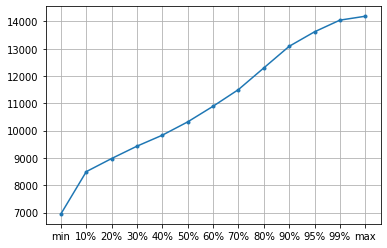

In [34]:
plt.plot(data_flat_filter_stat['load_path'].values[3:],'.-');
ticks = list(data_flat_filter_stat.index.values[3:])
plt.xticks([i for i in range(len(ticks))],ticks)
plt.grid()

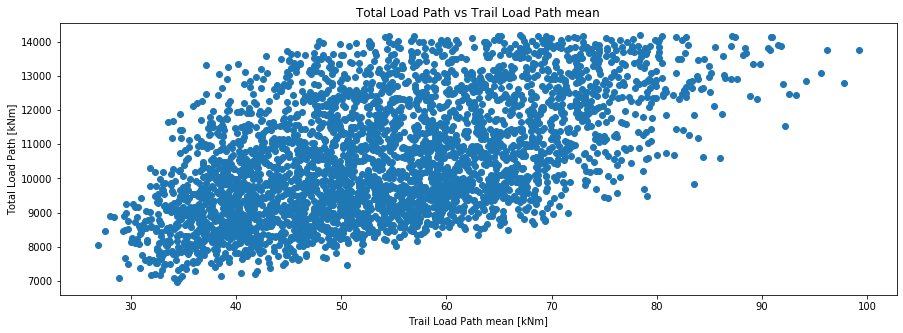

In [35]:
# Plot graph on features correlation

plt.rcParams['figure.figsize'] = [15,5] 
plt.title("Total Load Path vs Trail Load Path mean")
plt.ylabel("Total Load Path [kNm]")
plt.xlabel("Trail Load Path mean [kNm]")

plt.scatter( abs(data_flat_filter['traMag_mean'])*data_flat_filter['traLen_mean'], data_flat_filter['load_path'])
plt.show()

In [38]:
# Import branch-node matrix
branchNode = pd.read_csv(os.path.join(path, "CEM\\Data\\240806_data_00_branch-node_CEM.csv"), header=None)

branchNode_arr = branchNode.values[:][0]

In [39]:
branchNode

0    1    2    3    4    5    6    7    8    9    ...  250  251  252  253  \
0    0    6    1    7    2   10    3   11    4   12  ...    8    9    5    8   

   254  255  256  257  258  259  
0    4    9   53   58   45   48  

[1 rows x 260 columns]

In [40]:
# Create lists of nodes and edges

# Extract list of labels from DataFrame
data_filter_ind = list(data_filter.index.values[:])

# Initialize list of list of nodes and edges
posXYZ_listlist = []
edgeLen_listlist = []
edgeMag_listlist = []


data_filter_arr = data_filter.values[:]

# Iterate through each row of the array

for i in range(len(data_filter_arr)): 

    # Create arrays of nodes
    p0 = nX
    p1 = p0 + 3*nN
    posXYZ_arr = data_filter_arr[i][p0:p1]

    # Create arrays of trail edges    
    p0 = p1
    p1 = p0 + nT
    traLen_arr = data_filter_arr[i][p0:p1]
    
    p0 = p1
    p1 = p0 + nT
    traMag_arr = data_filter_arr[i][p0:p1]
    
    # Create arrays of deviation edges    
    p0 = p1
    p1 = p0 + nD
    devLen_arr = data_filter_arr[i][p0:p1]
    
    p0 = p1
    p1 = p0 + nD
    devMag_arr = data_filter_arr[i][p0:p1]   
    
    
    posXYZ_listlist.append(posXYZ_arr)
    edgeLen_listlist.append( np.concatenate((traLen_arr, devLen_arr), axis=None) )
    edgeMag_listlist.append( np.concatenate((traMag_arr, devMag_arr), axis=None) )

In [41]:
def truncate(f, n):
    '''Truncates/pads a float f to n decimal places without rounding'''
    s = '{}'.format(f)
    if 'e' in s or 'E' in s:
        return '{0:.{1}f}'.format(f, n)
    i, p, d = s.partition('.')
    return '.'.join([i, (d+'0'*n)[:n]])

130


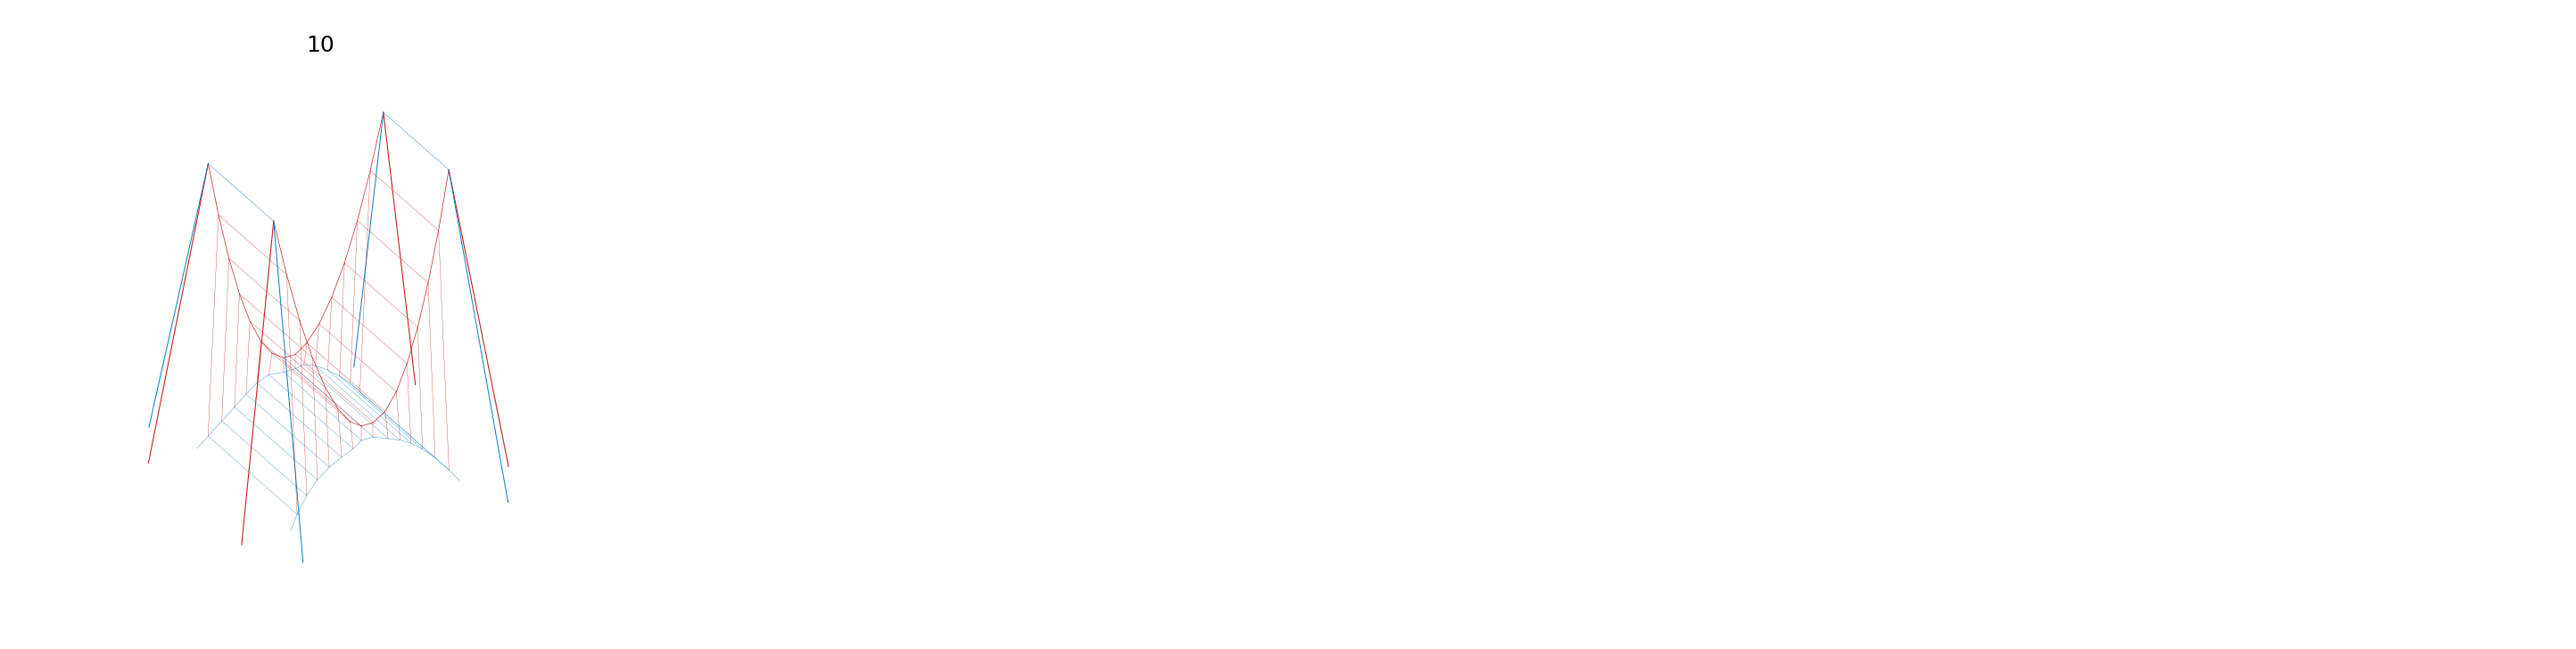

In [64]:
# Plot samples 3D

from mpl_toolkits.mplot3d import Axes3D

f0 = 10    # label of first sample
fN = 1    # number of samples
p0 = data_filter_ind.index(f0)    # get corresponding index of sample in not labelled list

nE = nT + nD

# Define general properties of figure

ncols = 4    # set number of columns for visualization
nrows = math.ceil(fN/ncols)

fig = plt.figure(figsize=(10*ncols,10*nrows), constrained_layout=True)
gs = fig.add_gridspec(nrows, ncols)
gs.update(wspace=0.1, hspace=0.1)    # set the spacing between axes


# Iterate through selected samples

for f in range(p0, p0 + fN):
    
    posXYZ_arr = posXYZ_listlist[f][:]    # nodes coordinates of sample f

    posXYZ_mat = []
    
    # Define array of coordinates
    for i in range(nN):
        x = posXYZ_arr[i]
        y = posXYZ_arr[nN + i]
        z = posXYZ_arr[2*nN + i] 
        posXYZ_mat.append( [x, y, z] )
    coords = np.array(posXYZ_mat)  

    # Set options for subplots
    row = (f-p0) // ncols
    col = (f-p0) % ncols
    ax = fig.add_subplot(gs[row,col], projection='3d')
    ax.set_title(str(data_filter.index[f]), size=25)
    ax.set_aspect('auto')
    ax.axis('off')
    
    # Set view
    ax.set_proj_type('ortho')
    #ax.set_proj_type('persp')
    #ax.view_init(elev=90, azim=-90) # 2D-XY
    #ax.view_init(elev=0, azim=90) # 2D-XZ
    #ax.view_init(elev=0, azim=0) # 2D-YZ
    #ax.view_init(elev=45, azim=45) # 3D-45
    ax.view_init(elev=30, azim=60) # 3D-30
    
    # Create bounding box to simulate equal axes aspect ratio
#     bW = 40.0
#     ax.plot(0.0, 0.0, 0.0, 'w')
#     ax.plot(0.0, 0.0, bW, 'w')
#     ax.plot(0.0, bW, 0.0, 'w')
#     ax.plot(0.0, bW, bW, 'w')   
#     ax.plot(bW, 0.0, 0.0, 'w')
#     ax.plot(bW, 0.0, bW, 'w')
#     ax.plot(bW, bW, 0.0, 'w')
#     ax.plot(bW, bW, bW, 'w')  
   
    # Iterate through edges of sample f
    print(nE)
    for edge_i in range(nE):
        
        edge = [ int(branchNode_arr[2*edge_i]), int(branchNode_arr[2*edge_i+1]) ]
        line_color = (5/256,120/256,190/256) if np.sign(edgeMag_listlist[f][edge_i]) < 0 else (200/256,20/256,20/256)
        line_width = 0.3 + np.abs(edgeMag_listlist[f][edge_i]/40)
             
        ax.plot(coords[edge,0], coords[edge,1], coords[edge,2], color = line_color, linewidth = line_width, antialiased=True, alpha = 1.0)

plt.show()

In [43]:
# Select features for SOM training

SOM_features = [
    'maximum_deck_inclination',
    'load_path',
    'posX_min',
    'posX_max',    
#     'posX_mean', 
#     'posX_std', 
#     'posX_skew', 
#     'posX_kurt', 
    'posY_min',
    'posY_max',    
#     'posY_mean', 
#     'posY_std', 
#     'posY_skew', 
#     'posY_kurt',
#     'posZ_min',
#     'posZ_max',  
#     'posZ_mean',
#     'posZ_std', 
#     'posZ_skew', 
#     'posZ_kurt',
#     'traLen_min',    
#     'traLen_max',    
#     'traLen_mean',
#     'traLen_std', 
#     'traLen_skew', 
#     'traLen_kurt', 
#     'traMag_min',    
#     'traMag_max',    
#     'traMag_mean',
#     'traMag_std', 
#     'traMag_skew', 
#     'traMag_kurt',
#     'devLen_min',    
#     'devLen_max',    
#     'devLen_mean',
#     'devLen_std', 
#     'devLen_skew', 
#     'devLen_kurt', 
#     'devMag_min',    
#     'devMag_max',    
#     'devMag_mean',
#     'devMag_std', 
#     'devMag_skew', 
#     'devMag_kurt'
    ]

# Create matrix of selected features
XX = data_flat_filter[SOM_features].values[:].astype(float)

In [44]:
# Calculate SOM

msz10 = 40    # define number of SOM-nodes in X directions
msz11 = 40    # define number of SOM-nodes in Y directions

som = SOM.SOM('', XX[:], mapsize = [msz10, msz11], norm_method = 'var', initmethod = 'pca')
som.train(n_job = 1, shared_memory = 'no',verbose = 'on')
som.compname=[SOM_features]

initialization method = pca, initializing..
initialization done in 0.035000 seconds

rough training...
radius_ini: 5.000000 , radius_final: 1.250000, trainlen: 14
epoch: 1 ---> elapsed time:  0.071000, quantization error: 0.991889 
epoch: 2 ---> elapsed time:  0.065000, quantization error: 0.999430 
epoch: 3 ---> elapsed time:  0.062000, quantization error: 0.972656 
epoch: 4 ---> elapsed time:  0.059000, quantization error: 0.904891 
epoch: 5 ---> elapsed time:  0.059000, quantization error: 0.837781 
epoch: 6 ---> elapsed time:  0.059000, quantization error: 0.794447 
epoch: 7 ---> elapsed time:  0.063000, quantization error: 0.760082 
epoch: 8 ---> elapsed time:  0.059000, quantization error: 0.728548 
epoch: 9 ---> elapsed time:  0.069000, quantization error: 0.696894 
epoch: 10 ---> elapsed time:  0.090000, quantization error: 0.664985 
epoch: 11 ---> elapsed time:  0.071000, quantization error: 0.633272 
epoch: 12 ---> elapsed time:  0.068000, quantization error: 0.599607 
epoch:

In [45]:
# Get distance/s and Best Matching Unit (BMU)/s indices for each sample

dists, bmus = som.find_K_nodes(som.data_raw, K=1)

[9, 2, 9, 3, 5, 3, 6, 4, 4, 4, 8, 1, 4, 6, 6, 3, 2, 3, 5, 3, 3, 1, 3, 8, 3, 5, 5, 5, 5, 3, 4, 5, 2, 3, 5, 6, 3, 3, 4, 3, 4, 2, 0, 0, 5, 4, 0, 1, 3, 2, 1, 3, 3, 0, 1, 4, 3, 5, 0, 1, 2, 2, 0, 1, 2, 1, 2, 1, 3, 1, 2, 1, 3, 2, 1, 1, 1, 1, 2, 5, 3, 2, 3, 5, 2, 5, 6, 3, 4, 1, 3, 1, 3, 3, 3, 1, 2, 2, 3, 1, 3, 3, 3, 1, 4, 0, 1, 2, 5, 0, 7, 1, 5, 2, 2, 1, 5, 1, 1, 6, 5, 2, 4, 3, 4, 4, 3, 2, 3, 2, 0, 3, 4, 2, 2, 5, 3, 4, 3, 3, 5, 1, 2, 4, 4, 0, 2, 1, 1, 2, 1, 1, 0, 3, 1, 4, 2, 2, 3, 2, 0, 3, 3, 2, 1, 4, 1, 3, 1, 3, 2, 4, 1, 4, 1, 3, 2, 2, 2, 1, 1, 4, 2, 2, 2, 0, 3, 5, 2, 4, 3, 4, 3, 1, 1, 6, 0, 5, 1, 6, 4, 3, 2, 3, 4, 2, 3, 4, 3, 3, 0, 7, 2, 2, 3, 3, 2, 1, 1, 2, 2, 2, 2, 1, 5, 2, 2, 3, 4, 0, 2, 0, 1, 1, 4, 1, 1, 6, 2, 4, 8, 2, 0, 4, 3, 1, 0, 3, 2, 1, 3, 0, 4, 1, 5, 1, 2, 4, 6, 1, 3, 2, 3, 5, 0, 5, 1, 6, 2, 3, 4, 4, 3, 4, 3, 4, 1, 2, 2, 3, 3, 2, 3, 2, 4, 5, 0, 5, 2, 2, 2, 4, 2, 2, 1, 3, 1, 1, 1, 2, 5, 0, 3, 1, 1, 4, 2, 0, 2, 2, 0, 3, 0, 2, 4, 1, 6, 1, 0, 5, 5, 1, 3, 0, 3, 4, 1, 1, 2, 4, 1, 0, 5, 

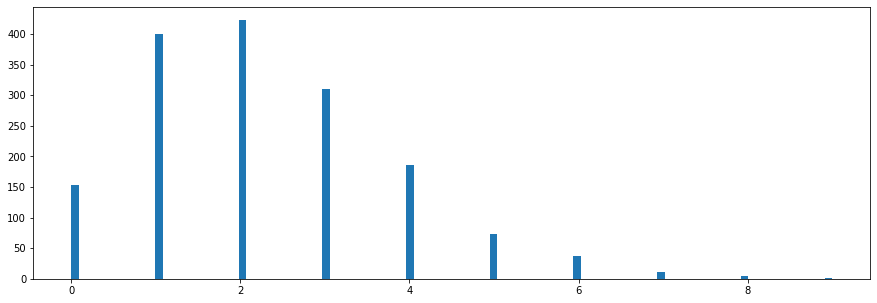

In [46]:
# Calculate number of samples in each SOM-node

n_bmus = [ np.sum(bmus==i) for i in range(som.nnodes) ]

plt.hist(n_bmus,bins=100)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

print(n_bmus)

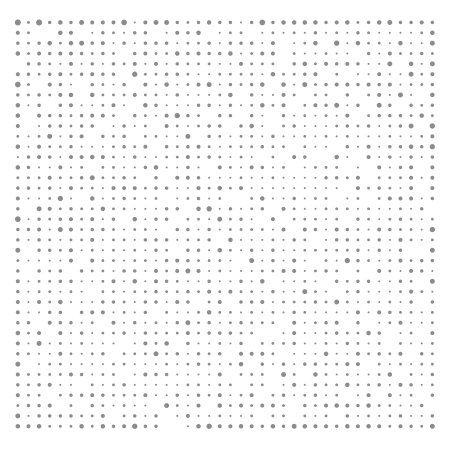

In [47]:
som.hit_map(col='gray')

In [48]:
# Get representative samples per SOM-nodes (samples that are closer to their corresponding BMUs)
sel_samples_SOM = []

for nnode in range(som.nnodes):
    
    # Get all samples per SOM-node
    samples_SOM = np.argwhere(bmus==nnode)[:,0]
    
    # Number of samples per SOM-node
    K = len(samples_SOM)   

    if K >= 1:
        # Sort samples according to distance within each BMU cluster
        DF_tmp = pd.DataFrame()
        DF_tmp['sel_samples_SOM'] = samples_SOM
        DF_tmp['dists'] = dists[samples_SOM]
        DF_tmp = DF_tmp.sort_values(by=['dists'])
        ord_samples_SOM = DF_tmp['sel_samples_SOM'].copy().values[:]     # ordered samples
        sel_sample_SOM = ord_samples_SOM[0]    # representative sample for SOM-node
        sel_samples_SOM.append(sel_sample_SOM)
    else:
        sel_samples_SOM.append(-1)

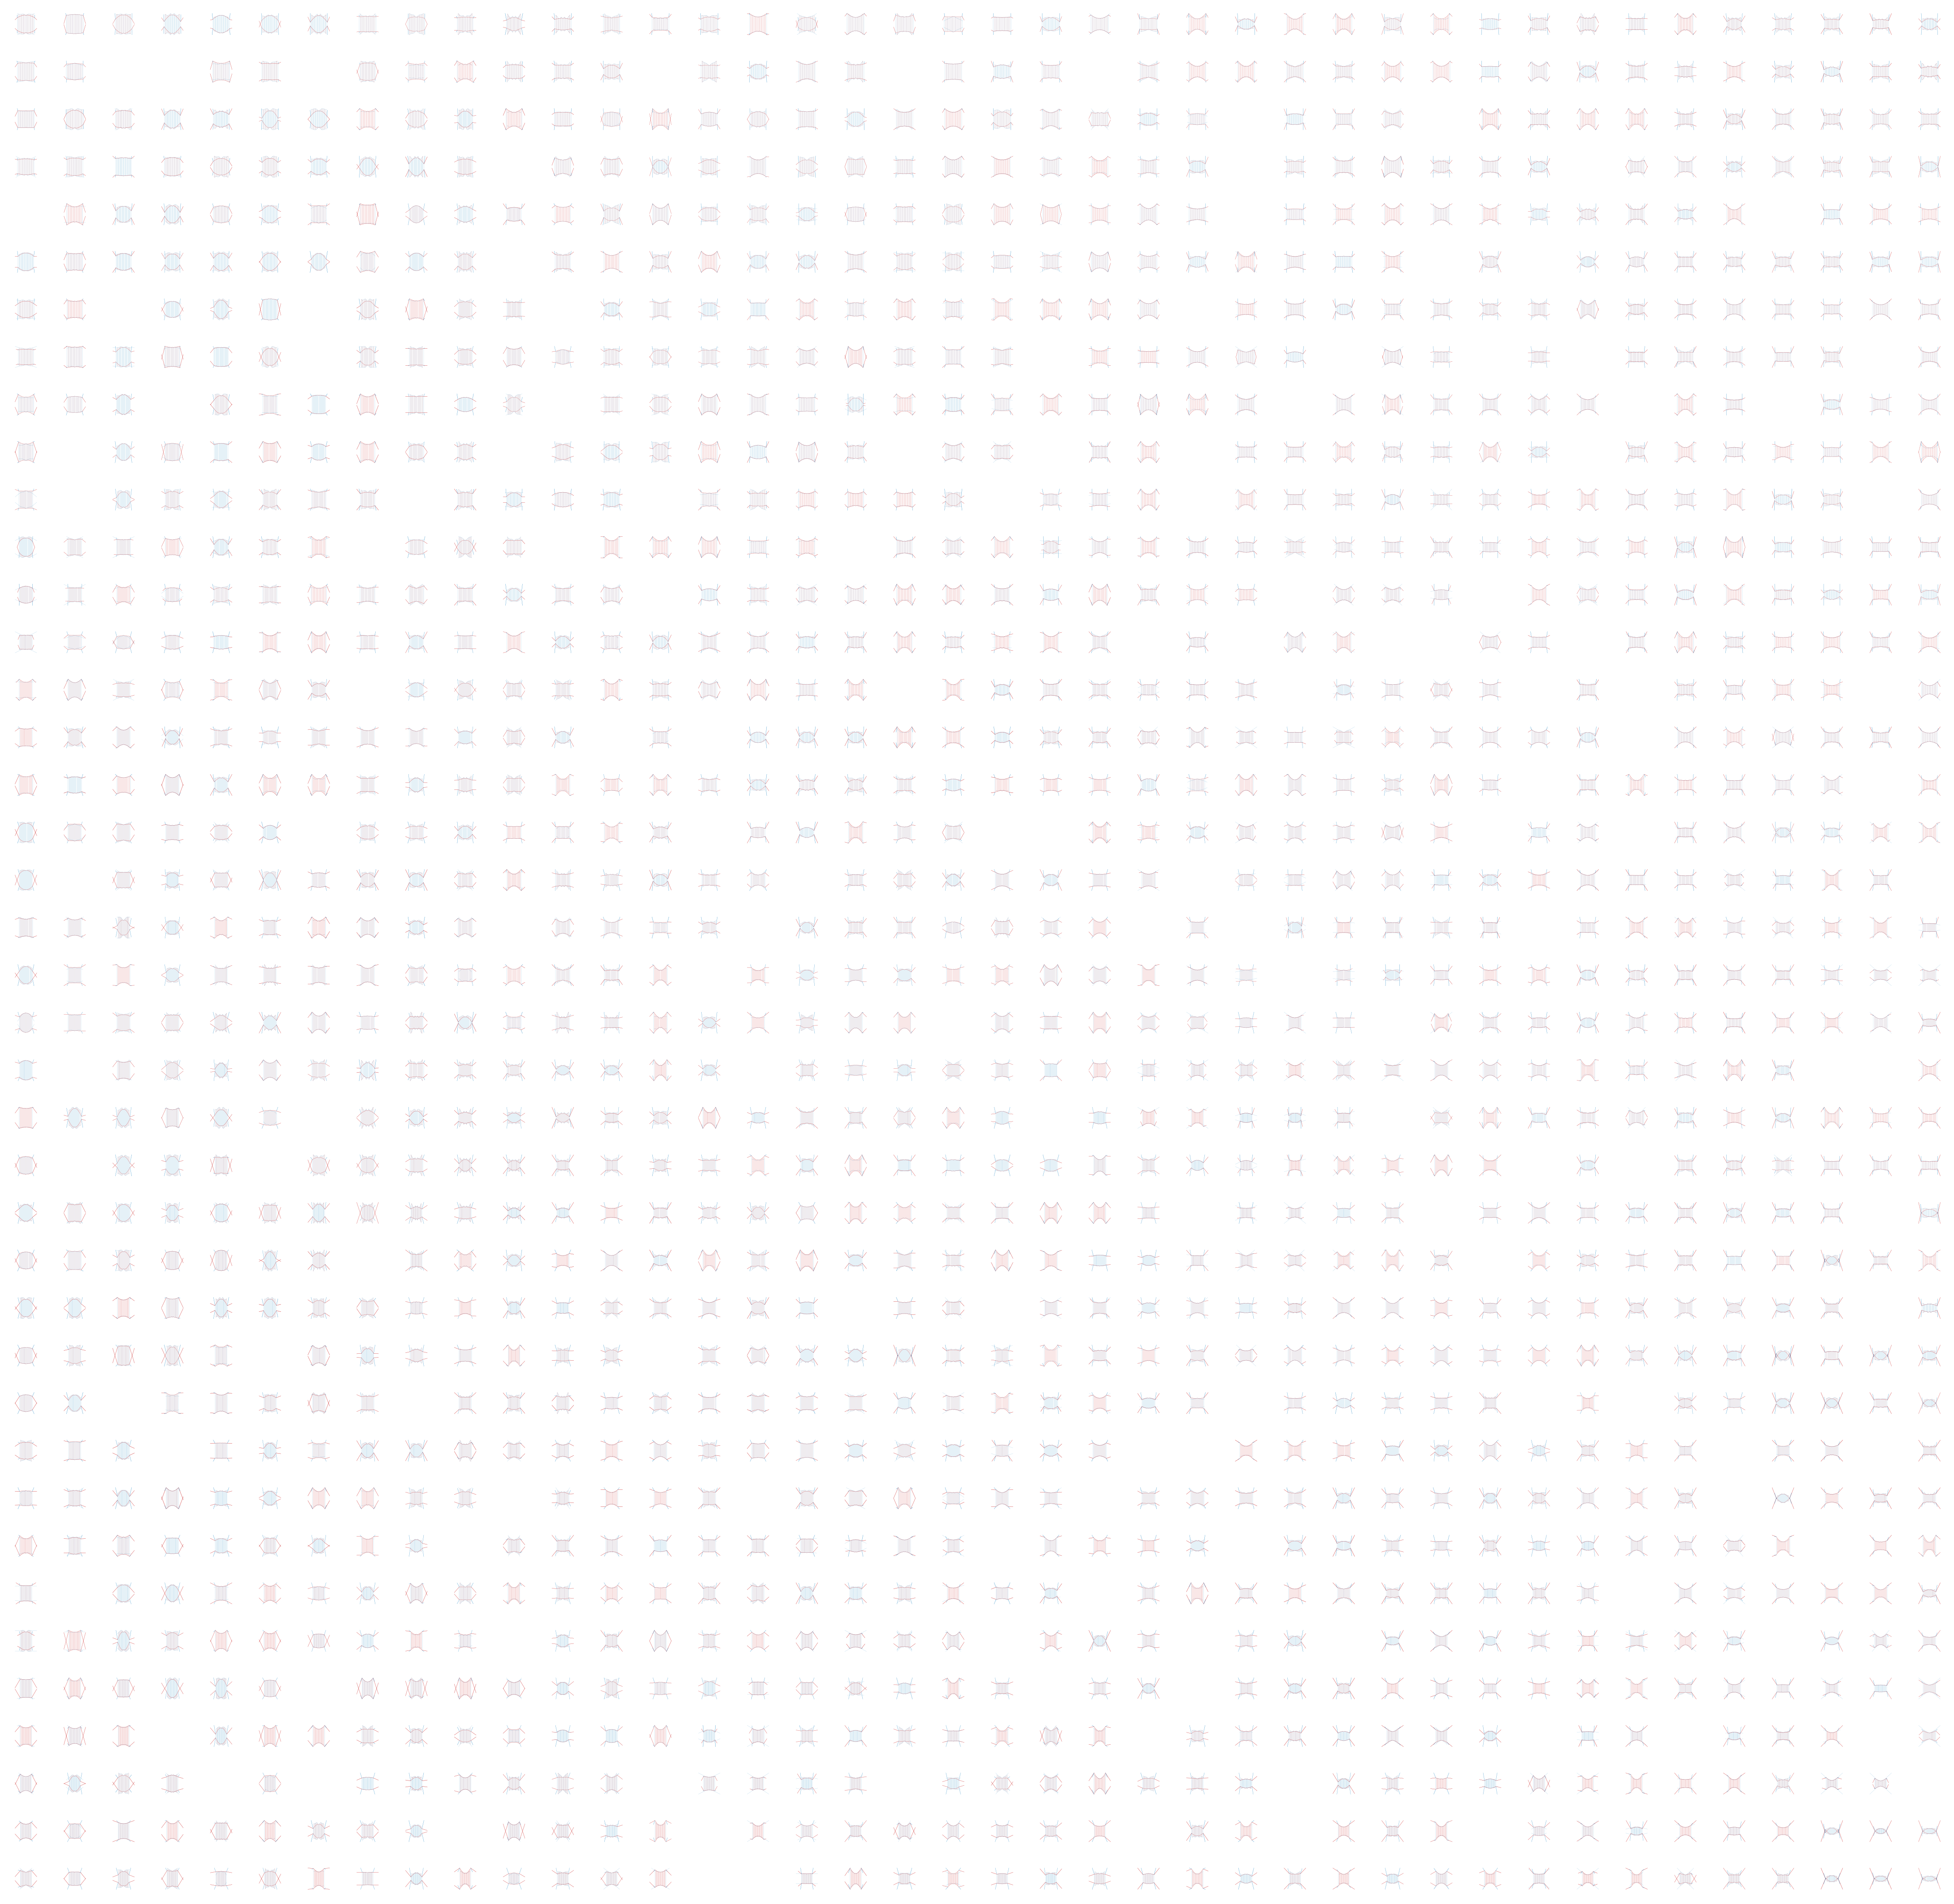

In [49]:
# Plot SOM with representative sample per SOM-node

from mpl_toolkits.mplot3d import Axes3D

nE = nT + nD

# Define general properties of figure

ncols = msz11    # set number of columns for visualization
nrows = msz10    # set number of rows for visualization

fig = plt.figure(figsize=(2*ncols,2*nrows))
gs = fig.add_gridspec(nrows, ncols)
gs.update(wspace=0.1, hspace=0.1)    # set the spacing between axes

    
# Iterate through SOM-nodes to plot representative samples 
for s in range(len(sel_samples_SOM)):

    f = sel_samples_SOM[s]    # representative sample f
    
    if f > -1:              

        posXYZ_arr = posXYZ_listlist[f][:]    # nodes coordinates of sample f
        posXYZ_mat = []

        # Define array of coordinates
        for i in range(nN):
            x = posXYZ_arr[i]
            y = posXYZ_arr[nN + i]
            z = posXYZ_arr[2*nN + i] 
            posXYZ_mat.append( [x, y, z] )
        coords = np.array(posXYZ_mat)  

        # Set options for subplots
        row = s // ncols
        col = s % ncols
        ax = fig.add_subplot(gs[row,col], projection='3d')
#         ax.set_title(str(data_filter.index[f]), size=10)
        ax.set_aspect('auto')
        ax.axis('off')
            
        # Set view
        ax.set_proj_type('ortho')
        #ax.set_proj_type('persp')
        ax.view_init(elev=90, azim=-90) # 2D-XY
        #ax.view_init(elev=0, azim=90) # 2D-XZ
        #ax.view_init(elev=0, azim=0) # 2D-YZ
        #ax.view_init(elev=45, azim=45) # 3D-45
        #ax.view_init(elev=30, azim=60) # 3D-30


        # Iterate through edges of sample f
        for edge_i in range(nE):

            edge = [ int(branchNode_arr[2*edge_i]), int(branchNode_arr[2*edge_i+1]) ]
            line_color = (5/256,120/256,190/256) if np.sign(edgeMag_listlist[f][edge_i]) < 0 else (200/256,20/256,20/256)
            line_width = 0.1 + np.abs(edgeMag_listlist[f][edge_i]/100)

            ax.plot(coords[edge,0], coords[edge,1], coords[edge,2], color = line_color, linewidth = line_width, antialiased=True, alpha = 1.0)                  
       
    else:
        continue
            
plt.show()

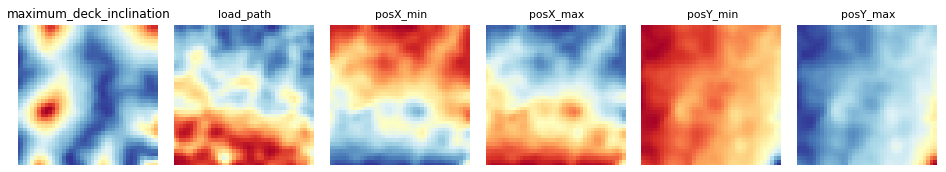

In [50]:
if XX.shape[1] > 100:
    pass
else:
    som.view_map(text_size=9)

In [51]:
# convert BMU index to xy position on SOM

xy_option = som.ind_to_xy(bmus[:,0])
xx = xy_option[:,1]
yy = som.mapsize[0]- xy_option[:,0]

In [54]:
def show_node(node_SOM=0, Measure1='load_path', Measure2='posX_mean'):
    
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from mpl_toolkits.mplot3d import Axes3D
    
    # Print index selected SOM-node
    print ('node index: ', node_SOM)

    # Get all samples in selected SOM-node
    samples_SOM = np.argwhere(bmus==node_SOM)[:,0]
       
    # Number of samples in selected SOM-node
    K = len(samples_SOM) 
    print('number samples: ', K)
   
    if K >= 1:
        
        # Define general properties of figure
        ncols = 4    # set number of columns for visualization
        nrows = math.ceil( K / ncols)    # set number of rows for visualization

        fig = plt.figure(figsize=(10*ncols,10*nrows), constrained_layout=True)
        gs = fig.add_gridspec(nrows, ncols)
        gs.update(wspace=0.1, hspace=0.1)    # set the spacing between axes
        
        # Sort samples in SOM_node according to distance within each BMU cluster
        DF_tmp = pd.DataFrame()
        DF_tmp['sel_samples_SOM'] = samples_SOM
        DF_tmp['dists'] = dists[samples_SOM]
        DF_tmp = DF_tmp.sort_values(by=['dists'])
        ord_samples_SOM = DF_tmp['sel_samples_SOM'].copy().values[:]     # ordered samples in selected SOM-node
                         
        # Iterate through ordered samples of selected SOM-node 
        for s in range(len(ord_samples_SOM)):

            f = ord_samples_SOM[s]
            
            posXYZ_arr = posXYZ_listlist[f][:]    # nodes coordinates of sample f

            posXYZ_mat = []

            # Define array of coordinates
            for i in range(nN):
                x = posXYZ_arr[i]
                y = posXYZ_arr[nN + i]
                z = posXYZ_arr[2*nN + i] 
                posXYZ_mat.append( [x, y, z] )
            coords = np.array(posXYZ_mat)  

            # Set options for subplots
            row = s // ncols
            col = s % ncols
            ax = fig.add_subplot(gs[row,col], projection='3d')
            title_ind = data_filter.index[f]
            title_feat_1 = truncate(data_flat_filter[Measure1].iloc[f], 2)
            title_feat_2 = truncate(data_flat_filter[Measure2].iloc[f], 2)
            ax.set_title(str(title_ind) + "  " + str(title_feat_1) + "  " + str(title_feat_2), size=25)
            ax.set_aspect('auto')
            ax.axis('off')

            # Set view
            ax.set_proj_type('ortho')
            #ax.set_proj_type('persp')
            #ax.view_init(elev=90, azim=-90) # 2D-XY
            ax.view_init(elev=0, azim=90) # 2D-XZ
            #ax.view_init(elev=0, azim=0) # 2D-YZ
            #ax.view_init(elev=45, azim=45) # 3D-45
            #ax.view_init(elev=30, azim=60) # 3D-30

            # Create bounding box to simulate equal axes aspect ratio
#             bW = 40.0
#             ax.plot(0.0, 0.0, 0.0, 'w')
#             ax.plot(0.0, 0.0, bW, 'w')
#             ax.plot(0.0, bW, 0.0, 'w')
#             ax.plot(0.0, bW, bW, 'w')   
#             ax.plot(bW, 0.0, 0.0, 'w')
#             ax.plot(bW, 0.0, bW, 'w')
#             ax.plot(bW, bW, 0.0, 'w')
#             ax.plot(bW, bW, bW, 'w')  

            # Iterate through edges of sample f
            for edge_i in range(nE):

                edge = [ int(branchNode_arr[2*edge_i]), int(branchNode_arr[2*edge_i+1]) ]
                line_color = (5/256,120/256,190/256) if np.sign(edgeMag_listlist[f][edge_i]) < 0 else (200/256,20/256,20/256)
                line_width = 0.3 + np.abs(edgeMag_listlist[f][edge_i]/40)

                ax.plot(coords[edge,0], coords[edge,1], coords[edge,2], color = line_color, linewidth = line_width, antialiased=True, alpha = 1.0)
    else:
        print ('not enough data for this node')

node index:  0
number samples:  9


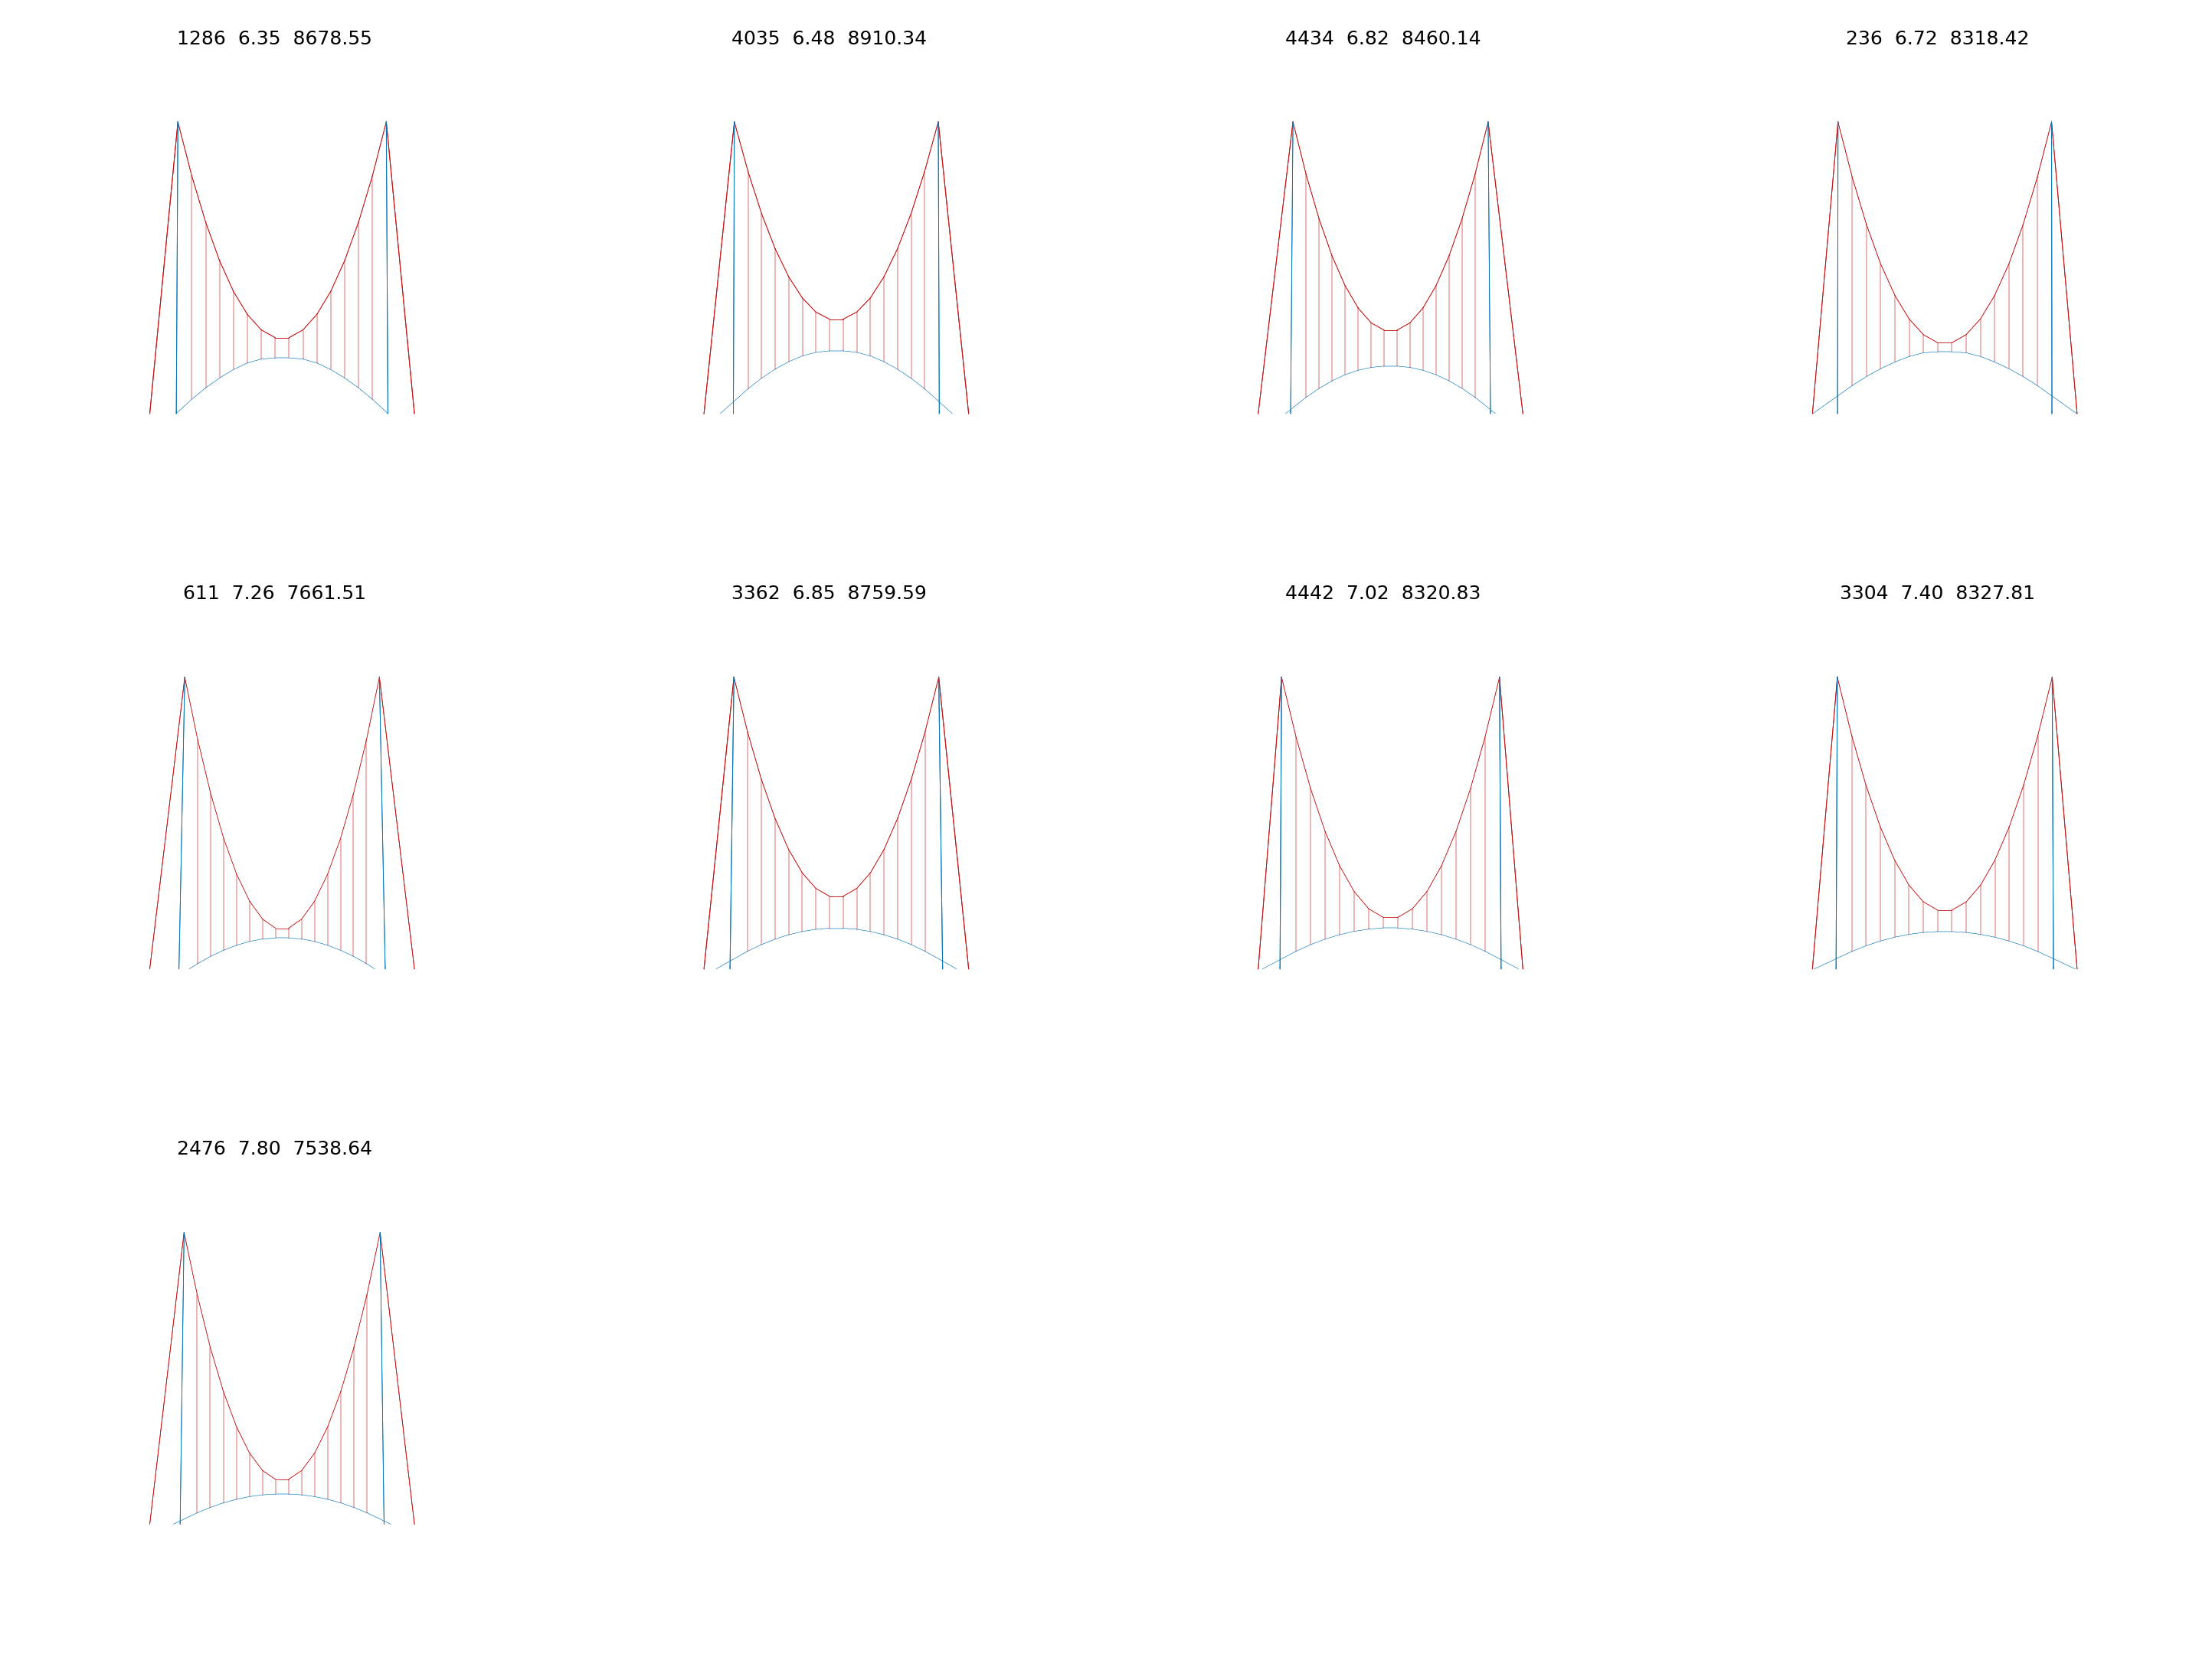

In [55]:
show_node(node_SOM = 0, Measure1='devLen_mean', Measure2='load_path')

node index:  39
number samples:  3


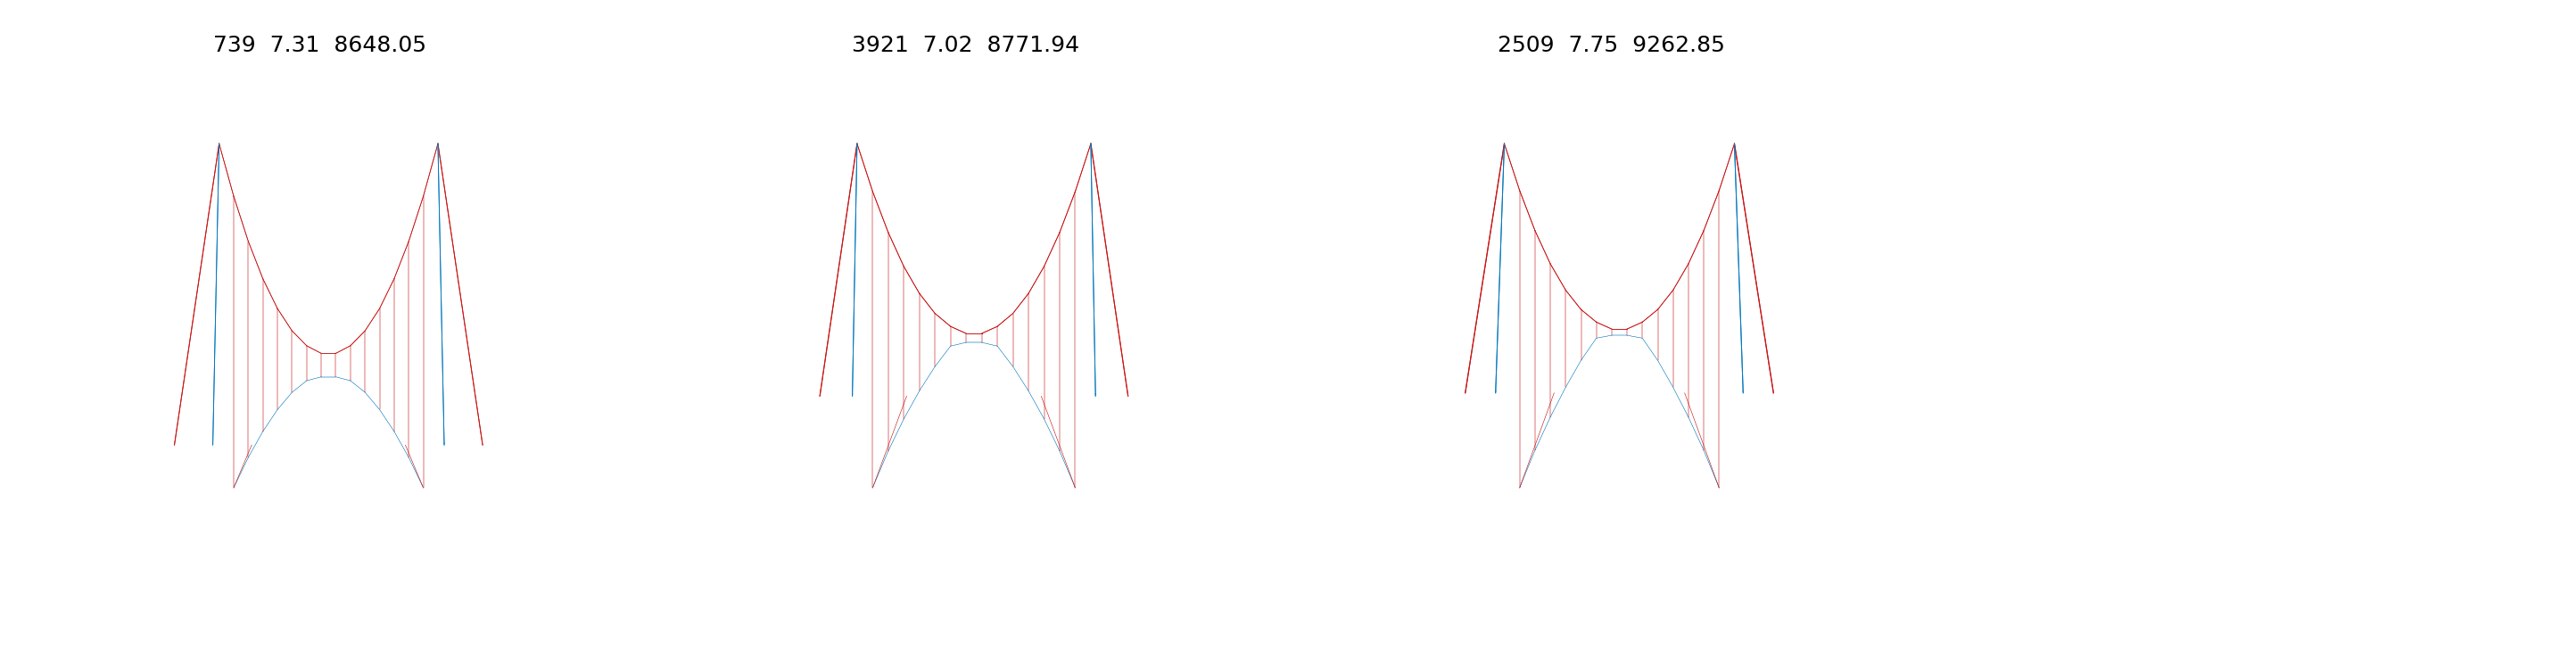

In [56]:
show_node(node_SOM=39, Measure1='devLen_mean', Measure2='load_path')

In [57]:
codebooks = SOM.denormalize_by(som.data_raw, som.codebook)
unq_bmus = np.unique(bmus)
xy_som = som.ind_to_xy(unq_bmus)


def query_nodes_new(Measure1=None, percentRange1=[0,50], Measure2=None, percentRange2=[0,50],
                    Measure3=None, percentRange3=[0,50], plot='Yes'):
    
    from IPython.display import clear_output, Image, display
  
    codebooks = SOM.denormalize_by(som.data_raw,som.codebook)

    DF_som = pd.DataFrame(data=codebooks,columns=list(som.compname[0]))
    percentiles = list(set(percentRange1).union(percentRange2).union(percentRange3))
    percentiles = list(np.sort(percentiles)/100.0)
    som_stat = DF_som.describe(percentiles=percentiles)

    ind_sel_nodes = []
    
    if Measure1 != None and  Measure2 != None and  Measure3 != None:
        ind_sel_nodes = DF_som.loc[
            (DF_som[Measure1] >= som_stat.loc[str(percentRange1[0])+'%'][Measure1])
            &
            (DF_som[Measure1] <= som_stat.loc[str(percentRange1[1])+'%'][Measure1])
            &
            (DF_som[Measure2] >= som_stat.loc[str(percentRange2[0])+'%'][Measure2])
            &
            (DF_som[Measure2] <= som_stat.loc[str(percentRange2[1])+'%'][Measure2])
            &
            (DF_som[Measure3] >= som_stat.loc[str(percentRange3[0])+'%'][Measure3])
            &
            (DF_som[Measure3] <= som_stat.loc[str(percentRange3[1])+'%'][Measure3])
        ].index.values[:]

    if Measure1 != None and Measure2 != None and Measure3 == None:
        ind_sel_nodes = DF_som.loc[
            (DF_som[Measure1] >= som_stat.loc[str(percentRange1[0])+'%'][Measure1])
            &
            (DF_som[Measure1] <= som_stat.loc[str(percentRange1[1])+'%'][Measure1])
            &
            (DF_som[Measure2] >= som_stat.loc[str(percentRange2[0])+'%'][Measure2])
            &
            (DF_som[Measure2] <= som_stat.loc[str(percentRange2[1])+'%'][Measure2])
        ].index.values[:]
    
    if Measure1 != None and  Measure2 == None and Measure3 == None:
        ind_sel_nodes = DF_som.loc[
            (DF_som[Measure1] >= som_stat.loc[str(percentRange1[0])+'%'][Measure1])
            &
            (DF_som[Measure1] <= som_stat.loc[str(percentRange1[1])+'%'][Measure1])
        ].index.values[:] 
    
    if plot=='Yes':
        xy_sel = som.ind_to_xy(ind_sel_nodes)            
        fig = plt.figure(figsize=(20,40))
        plt.rcParams.update({'font.size': 10})

        for i in range(codebooks.shape[1]):

            ax = fig.add_subplot(6,3,i+1)
            col = codebooks[unq_bmus,i]
            mn = col.min()
            mx = col.max()
            col = codebooks[ind_sel_nodes,i]
            x = xy_sel[:,1]*2
            y = som.mapsize[0]-1-xy_sel[:,0]*1
            sc = ax.scatter(x,y,s=200,c=col,cmap=plt.cm.RdYlBu_r,edgecolor='None',vmax=mx,vmin=mn,marker='o',alpha=1.);
            eps = 1
            plt.xlim(x.min()-eps,x.max()+eps)
            plt.ylim(y.min()-eps,y.max()+eps)
            plt.colorbar(sc,shrink=.5,ticks=[mn,(mn+mx)/2.0,mx])
            plt.title(som.compname[0][i])
            plt.tight_layout(pad=0.001, h_pad=0.0, w_pad=0.0)
            plt.xlim(0,som.mapsize[0]-1);
            plt.ylim(0,som.mapsize[1]-1);
            plt.xticks([]);
            plt.yticks([]);
    
    return ind_sel_nodes

In [58]:
# Design Option A

sel_options_A = query_nodes_new(Measure1='posX_min',percentRange1=[0,40], Measure2='maximum_deck_inclination',percentRange2=[0,30],
                                Measure3='load_path',percentRange3=[0,30], plot='No')
print("Selected nodes: " + str(len(sel_options_A)) + "/" + str(msz10*msz11))
print("")
print(sel_options_A)

Selected nodes: 2/1600

[825 866]


node index:  439
number samples:  7


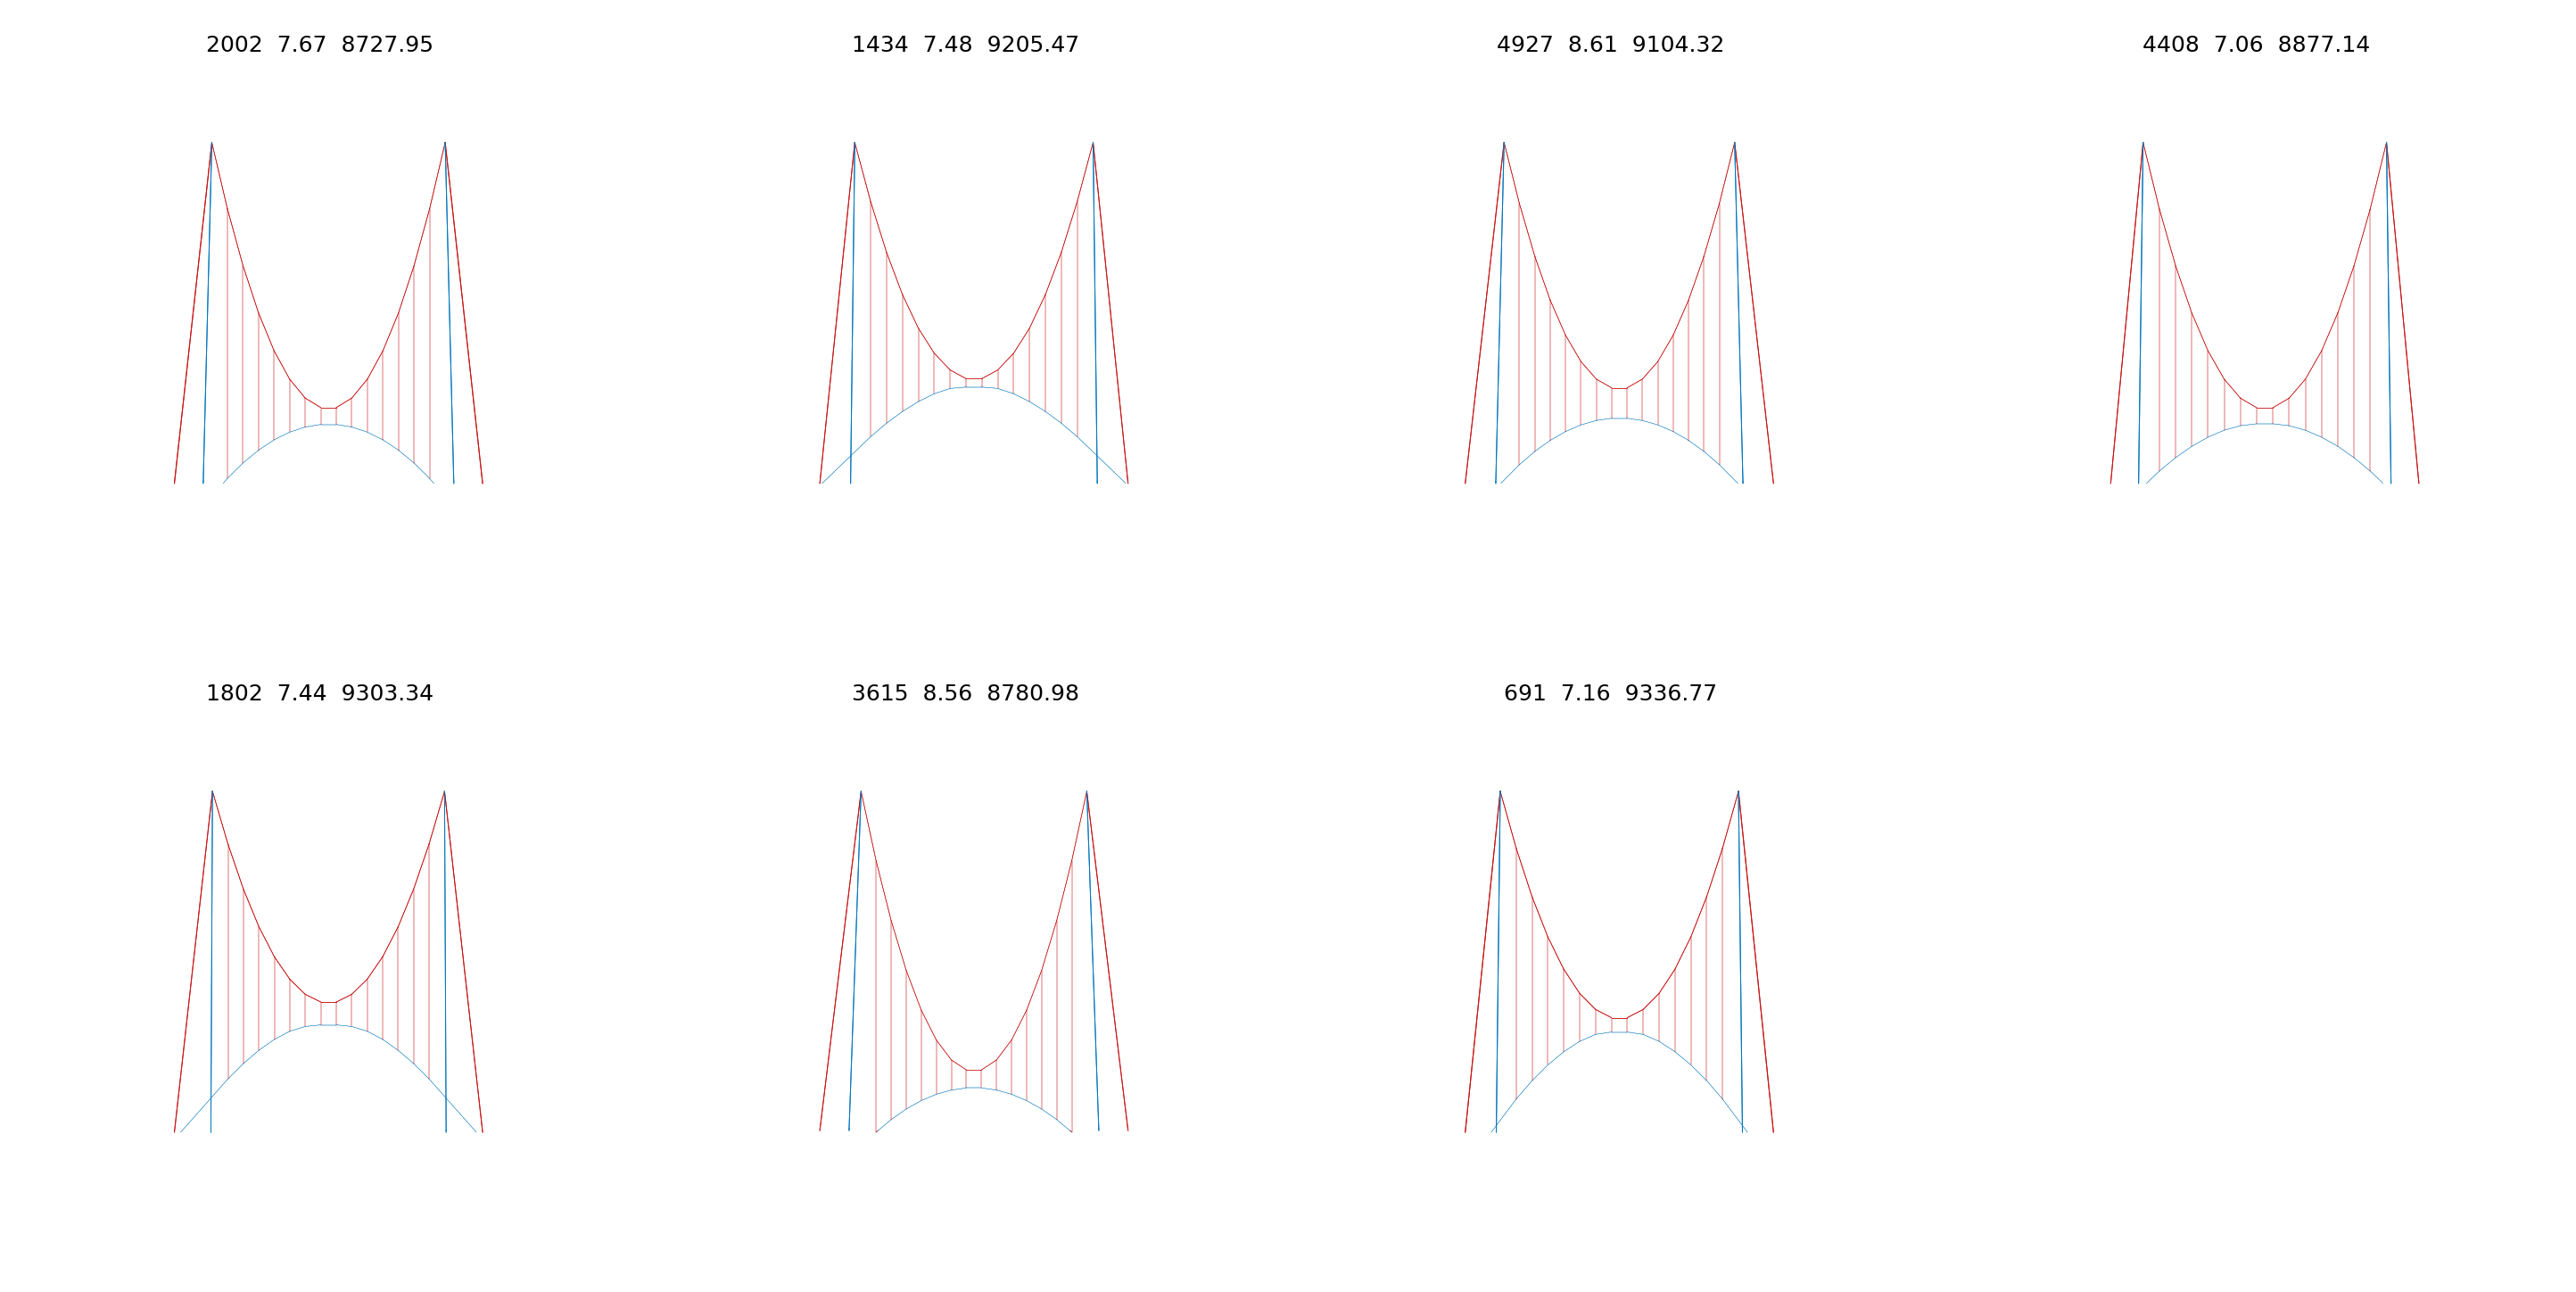

In [59]:
show_node(node_SOM=439, Measure1='devLen_mean', Measure2='load_path')

In [60]:
# Split DataFrame in train and test with Numpy and Scikit-learn

from sklearn.model_selection import train_test_split

X = input_data_filter.values # set input
Y = data_flat_filter[['load_path']].values # set output

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1)

print("Number elements in train set: "+str(len(Y_train)))
print("Number elements in test set: "+str(len(Y_test)))

Number elements in train set: 3275
Number elements in test set: 364


In [61]:
# Standardize X with Numpy and Scikit-learn

from sklearn.preprocessing import StandardScaler

ss = StandardScaler() 
ss.fit(X_train)
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

ss.fit(Y_train)
Y_train = ss.fit_transform(Y_train).ravel()
Y_test = ss.transform(Y_test).ravel()

In [62]:
# Multi-layer Perceptron Regressor

from sklearn.neural_network import MLPRegressor

mlpr = MLPRegressor(activation='relu', solver='adam', alpha=1e-6, hidden_layer_sizes=(10,15,10), max_iter=3000, random_state=0, verbose=False)

mlpr.fit(X_train, Y_train)

# y_pred_train = mlpr.predict(X_train)
# y_pred = mlpr.predict(X_test)

score_train = mlpr.score(X_train, Y_train)
score_test = mlpr.score(X_test, Y_test)
    
print("SCORE R2: TRAIN=%.4f TEST=%.4f" % (score_train,score_test))

SCORE R2: TRAIN=0.1457 TEST=-0.0069
